In [ ]:
import pandas as pd
import random
import numpy as np
from random import randint
import torch
from datasets import load_dataset

# from transformers import AutoTokenizer, AutoModel

# import adapters
# from adapters import AutoAdapterModel
# import gc

# import scipy as sp
# from scipy import sparse
# import sklearn
# from sklearn.feature_extraction.text import TfidfVectorizer

# from sklearn.decomposition import TruncatedSVD
# from sklearn.preprocessing import normalize

# from openTSNE import TSNE, affinity

import matplotlib.pyplot as plt
import matplotlib as mpl


import pickle
import time
import memory_profiler
from tqdm.notebook import tqdm

%load_ext memory_profiler

from pathlib import Path
import distro

%load_ext watermark

In [ ]:
# old one '1.8.1+cu111'
torch.__version__

'2.5.0+cu124'

In [ ]:
# %load_ext autoreload
# %autoreload 2

# from text_embeddings_src.model_stuff import train_loop
# from text_embeddings_src.data_stuff import (
#     SameSentencePairDataset,
# )
# from text_embeddings_src.embeddings import generate_embeddings

# from text_embeddings_src.metrics import knn_accuracy, logistic_accuracy
# from text_embeddings_src.dim_red import run_tsne_simple
# from text_embeddings_src.plotting import plot_tsne_colors

In [ ]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [ ]:
variables_path = Path("../../results/variables")
# variables_pubmed_path = Path("../../pubmed-landscape/results/variables")
figures_path = Path("../../results/figures/updated_dataset")
data_path = Path("../../data")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [ ]:
pwd

'/gpfs01/berens/user/rgonzalesmarquez'

In [ ]:
# MANUAL FIX TO PATH ISSUE FROM VSCODE
import text_embeddings_src

nb_path = Path(text_embeddings_src.__path__[0]).parents[0] / Path(
    "scripts/updated_dataset"
)
assert nb_path.exists(), "The path does not exist"

variables_path = (nb_path / variables_path).resolve(strict=True)
figures_path = (nb_path / figures_path).resolve(strict=True)
data_path = (nb_path / data_path).resolve(strict=True)

In [ ]:
plt.style.use((nb_path / Path("../matplotlib_style.txt")).resolve(strict=True))

## MTEB benchmark -- move to notebook 27

### Load results

In [ ]:
import os
import json


def load_mteb_results(directory):
    results = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                with open(file_path, "r") as f:
                    data = json.load(f)

                # Create a key based on the relative path
                relative_path = os.path.relpath(file_path, directory)
                key = os.path.splitext(relative_path)[
                    0
                ]  # Remove the .json extension
                results[key] = data

    return results

### Pre-trained MPNet

In [ ]:
# IMPORT RESULTS
model_name = "MPNet"
saving_path = (
    Path("embeddings_" + model_name.lower())
    / Path("updated_dataset")
    / Path("mteb_benchmark")
)
root_directory = variables_path / saving_path / "results_mpnet"
mteb_results_mpnet = load_mteb_results(root_directory)

In [ ]:
# mteb_results_mpnet[
#     "microsoft__mpnet-base/6996ce1e91bd2a9c7d7f61daec37463394f73f09/ArxivClusteringP2P"
# ]["scores"]["test"][0]["main_score"]

In [ ]:
# for key in list(mteb_results_mpnet.keys()):
#     task = key.split("/")[-1]
#     print(f"{task}")
#     print(mteb_results_mpnet[key])
#     print("--------------------------")

In [ ]:
# for key in np.sort(list(mteb_results_mpnet.keys())):
#     task = key.split("/")[-1]
#     if "scores" in mteb_results_mpnet[key].keys():
#         score = mteb_results_mpnet[key]["scores"]["test"][0]["main_score"]
#         print(f"{task}: {score:.3f}")
#     else:
#         continue

In [ ]:
# CREATE DIC FOR RESULTS
mteb_scores_mpnet = dict()
for key in np.sort(list(mteb_results_mpnet.keys())):
    task = key.split("/")[-1]
    if "scores" in mteb_results_mpnet[key].keys():
        # pretrained mpnet
        score_mpnet = mteb_results_mpnet[key]["scores"]["test"][0][
            "main_score"
        ]
        mteb_scores_mpnet[task] = score_mpnet

    else:
        continue

mteb_scores_mpnet

{'ArguAna': 0.22227,
 'ArxivClusteringP2P': 0.2779650469944176,
 'BiorxivClusteringP2P': 0.2316813048895084,
 'MedrxivClusteringP2P': 0.22468332848232406,
 'MindSmallReranking': 0.27467856502239324,
 'RedditClusteringP2P': 0.37379575022250616,
 'SCIDOCS': 0.01393,
 'STS12': 0.24343101795237168,
 'STS13': 0.5201615715576864,
 'STS14': 0.44645413158213426,
 'STS15': 0.5348951971140059,
 'STS16': 0.5058634949427733,
 'STSBenchmark': 0.5198777389220091,
 'SciDocsRR': 0.5605790878568542,
 'StackExchangeClusteringP2P': 0.26347092269579386,
 'TwentyNewsgroupsClustering': 0.13326264143335598}

### Fine-tuned MPNet (Crops)

In [ ]:
# IMPORT RESULTS
model_name = "MPNet"
saving_path = (
    Path("embeddings_" + model_name.lower())
    / Path("updated_dataset")
    / Path("mteb_benchmark")
)
root_directory = (
    variables_path
    / saving_path
    / f"results_{model_name.lower()}_crops_finetuning"
)
mteb_results_mpnet_crops = load_mteb_results(root_directory)

In [ ]:
# CREATE DIC FOR RESULTS
mteb_scores_mpnet_crops = dict()
for key in np.sort(list(mteb_results_mpnet_crops.keys())):
    task = key.split("/")[-1]
    if "scores" in mteb_results_mpnet_crops[key].keys():
        # pretrained mpnet
        score_mpnet = mteb_results_mpnet_crops[key]["scores"]["test"][0][
            "main_score"
        ]
        mteb_scores_mpnet_crops[task] = score_mpnet

    else:
        continue

In [ ]:
mteb_scores_mpnet_crops

{'ArguAna': 0.50645,
 'ArxivClusteringP2P': 0.3831448182125486,
 'BiorxivClusteringP2P': 0.3239812131713279,
 'MedrxivClusteringP2P': 0.30846324327144165,
 'MindSmallReranking': 0.3016545622166566,
 'RedditClusteringP2P': 0.5585157919463574,
 'SCIDOCS': 0.13043,
 'STS12': 0.4910681280246965,
 'STS13': 0.7369556305640635,
 'STS14': 0.6407907818531218,
 'STS15': 0.724794851067155,
 'STS16': 0.7595258391529889,
 'STSBenchmark': 0.7170197143136364,
 'SciDocsRR': 0.7361146962017713,
 'StackExchangeClusteringP2P': 0.31285921622475893,
 'TwentyNewsgroupsClustering': 0.27660299969511837}

### Fine-tuned MPNet (SimCSE-like)

In [ ]:
# IMPORT RESULTS
model_name = "MPNet"
saving_path = (
    Path("embeddings_" + model_name.lower())
    / Path("updated_dataset")
    / Path("mteb_benchmark")
)
root_directory = (
    variables_path
    / saving_path
    / f"results_{model_name.lower()}_simcse_finetuning"
)
mteb_results_mpnet_simcse = load_mteb_results(root_directory)

In [ ]:
# CREATE DIC FOR RESULTS
mteb_scores_mpnet_simcse = dict()
for key in np.sort(list(mteb_results_mpnet_simcse.keys())):
    task = key.split("/")[-1]
    if "scores" in mteb_results_mpnet_simcse[key].keys():
        # pretrained mpnet
        score_mpnet = mteb_results_mpnet_simcse[key]["scores"]["test"][0][
            "main_score"
        ]
        mteb_scores_mpnet_simcse[task] = score_mpnet

    else:
        continue

### Pre-trained SBERT

In [ ]:
# IMPORT RESULTS
model_name = "SBERT"
saving_path = (
    Path("embeddings_" + model_name.lower())
    / Path("updated_dataset")
    / Path("mteb_benchmark")
)
root_directory = variables_path / saving_path / f"results_{model_name.lower()}"
mteb_results_sbert = load_mteb_results(root_directory)

In [ ]:
# CREATE DIC FOR RESULTS
mteb_scores_sbert = dict()
for key in np.sort(list(mteb_results_sbert.keys())):
    task = key.split("/")[-1]
    if "scores" in mteb_results_sbert[key].keys():
        # pretrained mpnet
        score_mpnet = mteb_results_sbert[key]["scores"]["test"][0][
            "main_score"
        ]
        mteb_scores_sbert[task] = score_mpnet

    else:
        continue

### Pre-trained SimCSE

In [ ]:
# IMPORT RESULTS
model_name = "SimCSE"
saving_path = (
    Path("embeddings_" + model_name.lower())
    / Path("updated_dataset")
    / Path("mteb_benchmark")
)
root_directory = variables_path / saving_path / f"results_{model_name.lower()}"
mteb_results_simcse = load_mteb_results(root_directory)

In [ ]:
# CREATE DIC FOR RESULTS
mteb_scores_simcse = dict()
for key in np.sort(list(mteb_results_simcse.keys())):
    task = key.split("/")[-1]
    if "scores" in mteb_results_simcse[key].keys():
        # pretrained mpnet
        score_mpnet = mteb_results_simcse[key]["scores"]["test"][0][
            "main_score"
        ]
        mteb_scores_simcse[task] = score_mpnet

    else:
        continue

### Random embeddings layer 

In [ ]:
# IMPORT RESULTS

saving_path = (
    Path("embeddings_random_bert")
    / Path("updated_dataset")
    / Path("mteb_benchmark")
)
root_directory = (
    variables_path / saving_path / "results_embedding_layer_random_bert"
)
mteb_results_embeddings_layer_random = load_mteb_results(root_directory)

In [ ]:
# CREATE DIC FOR RESULTS
mteb_scores_embeddings_layer_random = dict()
for key in np.sort(list(mteb_results_embeddings_layer_random.keys())):
    task = key.split("/")[-1]
    if "scores" in mteb_results_embeddings_layer_random[key].keys():
        # pretrained mpnet
        score_mpnet = mteb_results_embeddings_layer_random[key]["scores"][
            "test"
        ][0]["main_score"]
        mteb_scores_embeddings_layer_random[task] = score_mpnet

    else:
        continue

### Random embeddings module 

In [ ]:
# # IMPORT RESULTS

# saving_path = (
#     Path("embeddings_random_bert")
#     / Path("updated_dataset")
#     / Path("mteb_benchmark")
# )
# root_directory = (
#     variables_path / saving_path / "results_embedding_module_random_bert"
# )
# mteb_results_embeddings_module_random = load_mteb_results(root_directory)

In [ ]:
# # CREATE DIC FOR RESULTS
# mteb_scores_embeddings_module_random = dict()
# for key in np.sort(list(mteb_results_embeddings_module_random.keys())):
#     task = key.split("/")[-1]
#     if "scores" in mteb_results_embeddings_module_random[key].keys():
#         # pretrained mpnet
#         score_mpnet = mteb_results_embeddings_module_random[key]["scores"][
#             "test"
#         ][0]["main_score"]
#         mteb_scores_embeddings_module_random[task] = score_mpnet

#     else:
#         continue

### Pre-trained embeddings module MPNet

In [ ]:
# # IMPORT RESULTS
# model_name = "MPNet"
# saving_path = (
#     Path("embeddings_" + model_name.lower())
#     / Path("updated_dataset")
#     / Path("mteb_benchmark")
# )
# root_directory = (
#     variables_path / saving_path / "results_embedding_module_mpnet"
# )
# mteb_results_embeddings_module_mpnet = load_mteb_results(root_directory)

In [ ]:
# # CREATE DIC FOR RESULTS
# mteb_scores_embeddings_module_mpnet = dict()
# for key in np.sort(list(mteb_results_embeddings_module_mpnet.keys())):
#     task = key.split("/")[-1]
#     if "scores" in mteb_results_embeddings_module_mpnet[key].keys():
#         # pretrained mpnet
#         score_mpnet = mteb_results_embeddings_module_mpnet[key]["scores"][
#             "test"
#         ][0]["main_score"]
#         mteb_scores_embeddings_module_mpnet[task] = score_mpnet

#     else:
#         continue

### Print table -- move to notebook 27

In [ ]:
tasks = [
    "ArxivClusteringP2P",
    "BiorxivClusteringP2P",
    "MedrxivClusteringP2P",
    "RedditClusteringP2P",
    # "TwentyNewsgroupsClustering",
    "StackExchangeClusteringP2P",
    "SciDocsRR",
    "MindSmallReranking",
    "SCIDOCS",
    "ArguAna",
    "STS12",
    "STS13",
    "STS14",
    "STS15",
    "STS16",
    "STSBenchmark",
]

In [ ]:
# PRINT RESULTS
for i, task in enumerate(tasks):
    if i == 0:
        headers = ["Task", "MPNet", "Dropout", "Crops", "SimCSE", "SBERT"]
        print("| {:29} |{:3} |{:3}|{:3}|{:3}|{:3}|".format(*headers))
        print(
            "--------------------------------------------------------------------"
        )

    print(
        f"| {task:29} | {mteb_scores_mpnet[task]*100:.1f} | {mteb_scores_mpnet_simcse[task]*100:.1f} | {mteb_scores_mpnet_crops[task]*100:.1f} | {mteb_scores_simcse[task]*100:.1f} | {mteb_scores_sbert[task]*100:.1f} |"
    )
    if i in {4, 6, 8, len(tasks) - 1}:
        print(
            "--------------------------------------------------------------------"
        )

| Task                          |MPNet |Dropout|Crops|SimCSE|SBERT|
--------------------------------------------------------------------
| ArxivClusteringP2P            | 27.8 | 33.3 | 38.3 | 35.4 | 48.1 |
| BiorxivClusteringP2P          | 23.2 | 31.1 | 32.4 | 30.1 | 39.3 |
| MedrxivClusteringP2P          | 22.5 | 29.3 | 30.8 | 28.0 | 35.6 |
| RedditClusteringP2P           | 37.4 | 49.5 | 55.9 | 44.7 | 56.6 |
| StackExchangeClusteringP2P    | 26.3 | 30.2 | 31.3 | 28.8 | 34.3 |
--------------------------------------------------------------------
| SciDocsRR                     | 56.1 | 64.6 | 73.6 | 69.5 | 88.7 |
| MindSmallReranking            | 27.5 | 28.4 | 30.2 | 29.3 | 31.0 |
--------------------------------------------------------------------
| SCIDOCS                       | 1.4 | 6.5 | 13.0 | 7.9 | 23.8 |
| ArguAna                       | 22.2 | 41.9 | 50.6 | 41.4 | 46.5 |
--------------------------------------------------------------------
| STS12                         | 24.3

In [ ]:
# PRINT RESULTS
for i, task in enumerate(tasks):
    if i == 0:
        headers = [
            "Task",
            "MPNet",
            "EmbdR",
            "EmbdM",
            "Crops",
            "Dropout",
            "SimCSE",
            "SBERT",
        ]
        print(
            "| {:29} |{:3} |{:3}|{:3}|{:3} |{:3}|{:3}|{:3}|".format(*headers)
        )
        print(
            "--------------------------------------------------------------------------------"
        )

    print(
        f"| {task:29} | {mteb_scores_mpnet[task]*100:.1f} |{mteb_scores_embeddings_module_random[task]*100:.1f} |{mteb_scores_embeddings_module_mpnet[task]*100:.1f} | {mteb_scores_mpnet_crops[task]*100:.1f} | {mteb_scores_mpnet_simcse[task]*100:.1f} | {mteb_scores_simcse[task]*100:.1f} | {mteb_scores_sbert[task]*100:.1f} |"
    )
    if i in {4, 6, 8, len(tasks) - 1}:
        print(
            "--------------------------------------------------------------------------------"
        )

| Task                          |MPNet |EmbdR|EmbdM|Crops |Dropout|SimCSE|SBERT|
--------------------------------------------------------------------------------
| ArxivClusteringP2P            | 27.8 |21.0 |21.2 | 38.3 | 33.3 | 35.4 | 48.1 |
| BiorxivClusteringP2P          | 23.2 |17.7 |17.3 | 32.4 | 31.1 | 30.1 | 39.3 |
| MedrxivClusteringP2P          | 22.5 |18.8 |19.2 | 30.8 | 29.3 | 28.0 | 35.6 |
| RedditClusteringP2P           | 37.4 |17.9 |17.9 | 55.9 | 49.5 | 44.7 | 56.6 |
| TwentyNewsgroupsClustering    | 13.3 |9.5 |9.5 | 27.7 | 22.5 | 26.7 | 50.1 |
--------------------------------------------------------------------------------
| SciDocsRR                     | 56.1 |66.7 |66.7 | 73.6 | 64.6 | 69.5 | 88.7 |
| MindSmallReranking            | 27.5 |25.6 |25.6 | 30.2 | 28.4 | 29.3 | 31.0 |
--------------------------------------------------------------------------------
| SCIDOCS                       | 1.4 |7.1 |7.1 | 13.0 | 6.5 | 7.9 | 23.8 |
| ArguAna                       | 2

In [ ]:
# PRINT RESULTS
for i, task in enumerate(tasks):
    if i == 0:
        headers = [
            "Task",
            "MPNet",
            "EmbdR",
            "Crops",
            "Dropout",
            "SimCSE",
            "SBERT",
        ]
        print("| {:29} |{:3} |{:3}|{:3} |{:3}|{:3}|{:3}|".format(*headers))
        print(
            "--------------------------------------------------------------------------------"
        )

    print(
        f"| {task:29} | {mteb_scores_mpnet[task]*100:.1f} |{mteb_scores_embeddings_layer_random[task]*100:.1f} | {mteb_scores_mpnet_crops[task]*100:.1f} | {mteb_scores_mpnet_simcse[task]*100:.1f} | {mteb_scores_simcse[task]*100:.1f} | {mteb_scores_sbert[task]*100:.1f} |"
    )
    if i in {4, 6, 8, len(tasks) - 1}:
        print(
            "--------------------------------------------------------------------------------"
        )

| Task                          |MPNet |EmbdR|Crops |Dropout|SimCSE|SBERT|
--------------------------------------------------------------------------------
| ArxivClusteringP2P            | 27.8 |24.2 | 38.3 | 33.3 | 35.4 | 48.1 |
| BiorxivClusteringP2P          | 23.2 |19.2 | 32.4 | 31.1 | 30.1 | 39.3 |
| MedrxivClusteringP2P          | 22.5 |20.2 | 30.8 | 29.3 | 28.0 | 35.6 |
| RedditClusteringP2P           | 37.4 |20.7 | 55.9 | 49.5 | 44.7 | 56.6 |
| StackExchangeClusteringP2P    | 26.3 |26.3 | 31.3 | 30.2 | 28.8 | 34.3 |
--------------------------------------------------------------------------------
| SciDocsRR                     | 56.1 |65.6 | 73.6 | 64.6 | 69.5 | 88.7 |
| MindSmallReranking            | 27.5 |25.9 | 30.2 | 28.4 | 29.3 | 31.0 |
--------------------------------------------------------------------------------
| SCIDOCS                       | 1.4 |9.6 | 13.0 | 6.5 | 7.9 | 23.8 |
| ArguAna                       | 22.2 |24.1 | 50.6 | 41.9 | 41.4 | 46.5 |
-----------

In [ ]:
# PRINT RESULTS
for i, task in enumerate(tasks):
    if i == 0:
        headers = [
            "Task",
            "MPNet",
            "SimCSE",
            "SBERT",
            "Crops",
            "Dropout",
            "Embdd*",
        ]
        print(
            " {:29} & {:3} & {:3} & {:3} & {:3} & {:3} & {:3} \\\\".format(
                *headers
            )
        )
        print("\midrule")

    print(
        f" {task:29} & {mteb_scores_mpnet[task]*100:.1f}\% & {mteb_scores_simcse[task]*100:.1f}\% & {mteb_scores_sbert[task]*100:.1f}\% & {mteb_scores_mpnet_crops[task]*100:.1f}\% & {mteb_scores_mpnet_simcse[task]*100:.1f}\% & {mteb_scores_embeddings_layer_random[task]*100:.1f}\%  \\\\ "
    )
    if i in {4, 6, 8, len(tasks) - 1}:
        print("\midrule")

 Task                          & MPNet & SimCSE & SBERT & Crops & Dropout & Embdd* \\
\midrule
 ArxivClusteringP2P            & 27.8\% & 35.4\% & 48.1\% & 38.3\% & 33.3\% & 24.2\%  \\ 
 BiorxivClusteringP2P          & 23.2\% & 30.1\% & 39.3\% & 32.4\% & 31.1\% & 19.2\%  \\ 
 MedrxivClusteringP2P          & 22.5\% & 28.0\% & 35.6\% & 30.8\% & 29.3\% & 20.2\%  \\ 
 RedditClusteringP2P           & 37.4\% & 44.7\% & 56.6\% & 55.9\% & 49.5\% & 20.7\%  \\ 
 StackExchangeClusteringP2P    & 26.3\% & 28.8\% & 34.3\% & 31.3\% & 30.2\% & 26.3\%  \\ 
\midrule
 SciDocsRR                     & 56.1\% & 69.5\% & 88.7\% & 73.6\% & 64.6\% & 65.6\%  \\ 
 MindSmallReranking            & 27.5\% & 29.3\% & 31.0\% & 30.2\% & 28.4\% & 25.9\%  \\ 
\midrule
 SCIDOCS                       & 1.4\% & 7.9\% & 23.8\% & 13.0\% & 6.5\% & 9.6\%  \\ 
 ArguAna                       & 22.2\% & 41.4\% & 46.5\% & 50.6\% & 41.9\% & 24.1\%  \\ 
\midrule
 STS12                         & 24.3\% & 67.5\% & 72.6\% & 49.1\% & 39.

In [ ]:
tasks = [
    "ArxivClusteringP2P",
    "BiorxivClusteringP2P",
    "MedrxivClusteringP2P",
    "RedditClusteringP2P",
    # "TwentyNewsgroupsClustering",
    "StackExchangeClusteringP2P",
    "SciDocsRR",
    "MindSmallReranking",
    "SCIDOCS",
    "ArguAna",
    # "STS12",
    # "STS13",
    # "STS14",
    "STS15",
    "STS16",
    "STSBenchmark",
]

In [ ]:
results = pd.DataFrame(
    # columns=["MPNet", "Crops", "Dropout", "SimCSE", "SBERT"],
    columns=[
        "MPNet",
        "SimCSE",
        "SBERT",
        "Crops",
        "Dropout",
        "Embdd*",
    ],
    index=tasks,
)
results

,MPNet,SimCSE,SBERT,Crops,Dropout,Embdd*
ArxivClusteringP2P,NaN,NaN,NaN,NaN,NaN,NaN
BiorxivClusteringP2P,NaN,NaN,NaN,NaN,NaN,NaN
MedrxivClusteringP2P,NaN,NaN,NaN,NaN,NaN,NaN
RedditClusteringP2P,NaN,NaN,NaN,NaN,NaN,NaN
StackExchangeClusteringP2P,NaN,NaN,NaN,NaN,NaN,NaN
SciDocsRR,NaN,NaN,NaN,NaN,NaN,NaN
MindSmallReranking,NaN,NaN,NaN,NaN,NaN,NaN
SCIDOCS,NaN,NaN,NaN,NaN,NaN,NaN
ArguAna,NaN,NaN,NaN,NaN,NaN,NaN
STS15,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# PRINT RESULTS
for i, task in enumerate(tasks):
    results["MPNet"].loc[task] = mteb_scores_mpnet[task] * 100
    results["SimCSE"].loc[task] = mteb_scores_simcse[task] * 100
    results["SBERT"].loc[task] = mteb_scores_sbert[task] * 100
    results["Crops"].loc[task] = mteb_scores_mpnet_crops[task] * 100
    results["Dropout"].loc[task] = mteb_scores_mpnet_simcse[task] * 100
    results["Embdd*"].loc[task] = (
        mteb_scores_embeddings_layer_random[task] * 100
    )

In [ ]:
results.astype(float).round(1)

,MPNet,SimCSE,SBERT,Crops,Dropout,Embdd*
ArxivClusteringP2P,27.8,35.4,48.1,38.3,33.3,24.2
BiorxivClusteringP2P,23.2,30.1,39.3,32.4,31.1,19.2
MedrxivClusteringP2P,22.5,28.0,35.6,30.8,29.3,20.2
RedditClusteringP2P,37.4,44.7,56.6,55.9,49.5,20.7
StackExchangeClusteringP2P,26.3,28.8,34.3,31.3,30.2,26.3
SciDocsRR,56.1,69.5,88.7,73.6,64.6,65.6
MindSmallReranking,27.5,29.3,31.0,30.2,28.4,25.9
SCIDOCS,1.4,7.9,23.8,13.0,6.5,9.6
ArguAna,22.2,41.4,46.5,50.6,41.9,24.1
STS15,53.5,82.3,85.7,72.5,63.5,63.8


In [ ]:
np.mean(results.MPNet)

33.36408697618821

In [ ]:
results.mean(axis=0).astype(float).round(1)

MPNet      33.4
SimCSE     46.1
SBERT      54.4
Crops      48.0
Dropout    42.7
Embdd*     33.8
dtype: float64

In [ ]:
clustering = (
    results.loc[
        [
            "ArxivClusteringP2P",
            "BiorxivClusteringP2P",
            "MedrxivClusteringP2P",
            "RedditClusteringP2P",
            "StackExchangeClusteringP2P",
        ]
    ]
    .mean(axis=0)
    .astype(float)
    .round(1)
)

In [ ]:
reranking = (
    results.loc[
        [
            "SciDocsRR",
            "MindSmallReranking",
        ]
    ]
    .mean(axis=0)
    .astype(float)
    .round(1)
)

In [ ]:
retrieval = (
    results.loc[
        [
            "SCIDOCS",
            "ArguAna",
        ]
    ]
    .mean(axis=0)
    .astype(float)
    .round(1)
)

In [ ]:
sts = (
    results.loc[
        [
            "STS15",
            "STS16",
            "STSBenchmark",
        ]
    ]
    .mean(axis=0)
    .astype(float)
    .round(1)
)

In [ ]:
print(clustering)
print(reranking)
print(retrieval)
print(sts)

MPNet      27.4
SimCSE     33.4
SBERT      42.8
Crops      37.7
Dropout    34.7
Embdd*     22.1
dtype: float64
MPNet      41.8
SimCSE     49.4
SBERT      59.8
Crops      51.9
Dropout    46.5
Embdd*     45.8
dtype: float64
MPNet      11.8
SimCSE     24.7
SBERT      35.1
Crops      31.8
Dropout    24.2
Embdd*     16.8
dtype: float64
MPNet      52.0
SimCSE     79.5
SBERT      83.0
Crops      73.4
Dropout    65.9
Embdd*     56.5
dtype: float64


In [ ]:
MPNet      27.4
SimCSE     33.4
SBERT      
Crops      
Dropout    34.7
Embdd*     22.1
dtype: float64
MPNet      41.8
SimCSE     49.4
SBERT      
Crops      
Dropout    46.5
Embdd*     45.8
dtype: float64
MPNet      11.8
SimCSE     24.7
SBERT      
Crops      
Dropout    24.2
Embdd*     16.8
dtype: float64
MPNet      52.0
SimCSE     79.5
SBERT      
Crops      
Dropout    65.9
Embdd*     56.5

In [ ]:
((clustering + reranking + retrieval + sts) / 4).round(1)

MPNet      33.2
SimCSE     46.8
SBERT      55.2
Crops      48.7
Dropout    42.8
Embdd*     35.3
dtype: float64

In [ ]:
33.2 & 46.8 & 55.2 & 48.7 & 42.8 & 35.3 

In [ ]:
print(np.round(42.8 - 37.7, 1))
print(np.round(59.8 - 51.9, 1))
print(np.round(35.1 - 31.8, 1))
print(np.round(83.0 - 73.4, 1))

5.1
7.9
3.3
9.6


# Datasets -- move to notebook 29

## Stats

In [ ]:
datasets_names = [
    # "arxiv",
    "biorxiv",
    "medrxiv",
    "reddit",
    "stackexchange",
]
datasets_paths = [
    # "mteb/arxiv-clustering-p2p",
    "mteb/biorxiv-clustering-p2p",
    "mteb/medrxiv-clustering-p2p",
    "mteb/reddit-clustering-p2p",
    "mteb/stackexchange-clustering-p2p",
]

In [ ]:
dataset_stats = pd.DataFrame(
    columns=[
        "# samples",
        "# classes",
        "Mean length",
        "Std length",
    ],
    index=datasets_names,
)
dataset_stats

,# samples,# classes,Mean length,Std length
biorxiv,NaN,NaN,NaN,NaN
medrxiv,NaN,NaN,NaN,NaN
reddit,NaN,NaN,NaN,NaN
stackexchange,NaN,NaN,NaN,NaN


In [ ]:
for i, dataset_name in enumerate(datasets_names):
    print(dataset_name)
    dataset = load_dataset(datasets_paths[i])
    sentences = list(
        np.hstack(dataset.data["test"].to_pandas().sentences.to_numpy())
    )
    labels = list(
        np.hstack(dataset.data["test"].to_pandas().labels.to_numpy())
    )

    # calculate stats
    dataset_stats["# samples"].loc[dataset_name] = len(labels)
    dataset_stats["# classes"].loc[dataset_name] = len(np.unique(labels))

    length = [len(x) for x in sentences]
    dataset_stats["Mean length"].loc[dataset_name] = int(
        np.round(np.mean(length))
    )
    dataset_stats["Std length"].loc[dataset_name] = int(
        np.round(np.std(length))
    )

biorxiv
medrxiv
reddit
stackexchange


In [ ]:
dataset_stats

,# samples,# classes,Mean length,Std length
biorxiv,53787,26,1664,542
medrxiv,17647,51,1985,843
reddit,459399,450,728,710
stackexchange,75000,610,1091,809


#### Add ICLR

In [ ]:
%%time
iclr2024 = pd.read_parquet(
    data_path / "iclr2024.parquet.gzip",
    # index=False,
    engine="pyarrow",
    # compression="gzip",
)

CPU times: user 321 ms, sys: 77.1 ms, total: 398 ms
Wall time: 732 ms


In [ ]:
iclr2024.head()

,index,year,id,title,abstract,authors,decision,scores,keywords,gender-first,gender-last,t-SNE x,t-SNE y
0,0,2017,S1VaB4cex,FractalNet: Ultra-Deep Neural Networks without...,We introduce a design strategy for neural netw...,"Gustav Larsson, Michael Maire, Gregory Shakhna...",Accept (Poster),"[5, 7, 6, 6]",[],male,male,-28.117955,-20.418127
1,1,2017,H1W1UN9gg,Deep Information Propagation,We study the behavior of untrained neural netw...,"Samuel S. Schoenholz, Justin Gilmer, Surya Gan...",Accept (Poster),"[8, 9, 8]","[theory, deep learning]",male,None,-32.466820,-10.791123
2,2,2017,r1GKzP5xx,Recurrent Normalization Propagation,We propose a LSTM parametrization that preser...,"César Laurent, Nicolas Ballas, Pascal Vincent",Invite to Workshop Track,"[4, 6, 6]","[deep learning, optimization]",None,male,3.504240,19.946053
3,3,2017,S1J0E-71l,Surprisal-Driven Feedback in Recurrent Networks,Recurrent neural nets are widely used for pred...,"K, a, m, i, l, , R, o, c, k, i",Reject,"[3, 4, 3]","[unsupervised learning, applications, deep lea...",None,None,4.553473,16.037763
4,4,2017,SJGCiw5gl,Pruning Convolutional Neural Networks for Reso...,We propose a new formulation for pruning convo...,"Pavlo Molchanov, Stephen Tyree, Tero Karras, T...",Accept (Poster),"[6, 7, 9]","[deep learning, transfer learning]",None,male,-25.827705,-37.891772


In [ ]:
labels_iclr = np.load(variables_path / "updated_dataset" / "labels_iclr.npy")

In [ ]:
# calculate stats
dataset_stats.loc["ICLR"] = np.zeros(len(dataset_stats.iloc[0]))

dataset_stats["# samples"].loc["ICLR"] = len(labels_iclr)
dataset_stats["# classes"].loc["ICLR"] = len(np.unique(labels_iclr))
length = [len(x) for x in iclr2024.abstract.to_numpy()]
dataset_stats["Mean length"].loc["ICLR"] = int(np.round(np.mean(length)))
dataset_stats["Std length"].loc["ICLR"] = int(np.round(np.std(length)))

In [ ]:
dataset_stats

,# samples,# classes,Mean length,Std length
biorxiv,53787,26,1664,542
medrxiv,17647,51,1985,843
reddit,459399,450,728,710
stackexchange,75000,610,1091,809
ICLR,24347,46,1248,316


### Add arxiv

In [ ]:
dataset_name = "arxiv"
dataset_path = "mteb/arxiv-clustering-p2p"

In [ ]:
dataset = load_dataset("mteb/arxiv-clustering-p2p")

In [ ]:
sentences = list(
    np.hstack(dataset.data["test"].to_pandas().sentences.to_numpy())
)
labels_secondary = list(
    np.hstack(dataset.data["test"].to_pandas().labels.to_numpy())
)

In [ ]:
labels_main = [elem.split(".")[0] for elem in labels_secondary]

In [ ]:
# calculate stats
dataset_stats.loc["arxiv_main"] = np.zeros(len(dataset_stats.iloc[0]))

dataset_stats["# samples"].loc["arxiv_main"] = len(labels_main)
dataset_stats["# classes"].loc["arxiv_main"] = len(np.unique(labels_main))
length = [len(x) for x in sentences]
dataset_stats["Mean length"].loc["arxiv_main"] = int(np.round(np.mean(length)))
dataset_stats["Std length"].loc["arxiv_main"] = int(np.round(np.std(length)))

In [ ]:
# calculate stats
dataset_stats.loc["arxiv_secondary"] = np.zeros(len(dataset_stats.iloc[0]))

dataset_stats["# samples"].loc["arxiv_secondary"] = len(labels_secondary)
dataset_stats["# classes"].loc["arxiv_secondary"] = len(
    np.unique(labels_secondary)
)
length = [len(x) for x in sentences]
dataset_stats["Mean length"].loc["arxiv_secondary"] = int(
    np.round(np.mean(length))
)
dataset_stats["Std length"].loc["arxiv_secondary"] = int(
    np.round(np.std(length))
)

In [ ]:
dataset_stats

,# samples,# classes,Mean length,Std length
biorxiv,53787,26,1664,542
medrxiv,17647,51,1985,843
reddit,459399,450,728,710
stackexchange,75000,610,1091,809
ICLR,24347,46,1248,316
arxiv_main,732723,39,1010,432
arxiv_secondary,732723,180,1010,432


In [ ]:
np.unique(labels_main)
np.unique(labels_secondary)

array(['acc-phys', 'adap-org', 'alg-geom', 'ao-sci', 'astro-ph',
       'astro-ph.CO', 'astro-ph.EP', 'astro-ph.GA', 'astro-ph.HE',
       'astro-ph.IM', 'astro-ph.SR', 'atom-ph', 'chao-dyn', 'chem-ph',
       'cmp-lg', 'comp-gas', 'cond-mat', 'cond-mat.dis-nn',
       'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cond-mat.other',
       'cond-mat.quant-gas', 'cond-mat.soft', 'cond-mat.stat-mech',
       'cond-mat.str-el', 'cond-mat.supr-con', 'cs', 'cs.AI', 'cs.AR',
       'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR', 'cs.CV', 'cs.CY',
       'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS', 'cs.ET', 'cs.FL',
       'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC', 'cs.IR', 'cs.IT', 'cs.LG',
       'cs.LO', 'cs.MA', 'cs.MM', 'cs.MS', 'cs.NA', 'cs.NE', 'cs.NI',
       'cs.OH', 'cs.OS', 'cs.PF', 'cs.PL', 'cs.RO', 'cs.SC', 'cs.SD',
       'cs.SE', 'cs.SI', 'cs.SY', 'dg-ga', 'econ', 'econ.EM', 'econ.GN',
       'econ.TH', 'eess', 'eess.AS', 'eess.IV', 'eess.SP', 'eess.SY',
       'funct-an', 'gr-qc', 'hep', 'he

In [ ]:
print(dataset_stats)

                # samples # classes Mean length Std length
biorxiv             53787        26        1664        542
medrxiv             17647        51        1985        843
reddit             459399       450         728        710
stackexchange       75000       610        1091        809
ICLR                24347        46        1248        316
arxiv_main         732723        39        1010        432
arxiv_secondary    732723       180        1010        432


In [ ]:
               & # samples & # classes & Mean length &  Std length \\
ICLR             &   24347 &    46 &   1248 &    316 \\
arxiv            &  732723 &   180 &   1010 &    432 \\
biorxiv          &   53787 &    26 &   1664 &    542 \\
medrxiv          &   17647 &    51 &   1985 &    843 \\
reddit           &  459399 &   450 &    728 &    710 \\
stackexchange    &   75000 &   610 &   1091 &    809 \\


### Biorxiv

In [ ]:
dataset_name = "biorxiv"
dataset_path = "mteb/biorxiv-clustering-p2p"

In [ ]:
dataset = load_dataset(dataset_path)

In [ ]:
dataset

DatasetDict({
    test: Dataset({
        features: ['sentences', 'labels'],
        num_rows: 53787
    })
})

In [ ]:
sentences = list(
    np.hstack(dataset.data["test"].to_pandas().sentences.to_numpy())
)
labels = list(np.hstack(dataset.data["test"].to_pandas().labels.to_numpy()))

In [ ]:
print("# samples", len(labels))
print("# classes", len(np.unique(labels)))

# samples 53787
# classes 26


In [ ]:
unique_labels, counts = np.unique(labels, return_counts=True)

In [ ]:
colors = np.load(
    variables_path / "updated_dataset" / f"colors_{dataset_name}.npy"
)
pickle_in = open(
    variables_path
    / "updated_dataset"
    / f"dict_label_to_color_{dataset_name}.pkl",
    "rb",
)
dict_label_to_color = pickle.load(pickle_in)

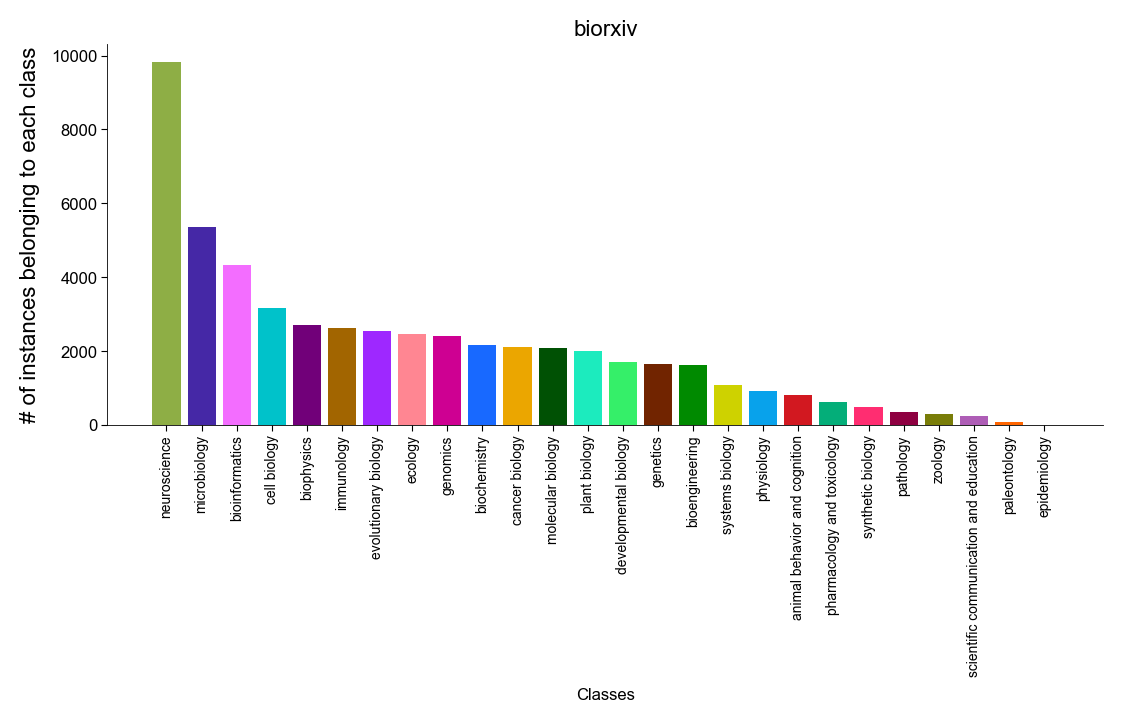

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5.5, 3.5), dpi=200, layout="constrained")

ax.bar(
    np.arange(len(np.unique(labels))),
    np.flip(np.sort(counts)),
    color=np.array(list(dict_label_to_color.values()))[
        np.flip(np.argsort(counts))
    ],
)

ax.set_xticks(
    np.arange(len(np.unique(labels))),
    labels=unique_labels[np.flip(np.argsort(counts))],
    rotation="vertical",
    fontsize=5,
)
ax.set_ylabel("# of instances belonging to each class", fontsize=8)
ax.set_xlabel("Classes")
ax.set_title(f"{dataset_name}")


fig.savefig(figures_path / f"barplot_class_distribution_{dataset_name}.png")

### Medrxiv

In [ ]:
dataset_name = "medrxiv"
dataset_path = "mteb/medrxiv-clustering-p2p"

In [ ]:
dataset = load_dataset(dataset_path)

In [ ]:
dataset

DatasetDict({
    test: Dataset({
        features: ['sentences', 'labels'],
        num_rows: 17647
    })
})

In [ ]:
sentences = list(
    np.hstack(dataset.data["test"].to_pandas().sentences.to_numpy())
)
labels = list(np.hstack(dataset.data["test"].to_pandas().labels.to_numpy()))

In [ ]:
print("# samples", len(labels))
print("# classes", len(np.unique(labels)))

# samples 17647
# classes 51


In [ ]:
unique_labels, counts = np.unique(labels, return_counts=True)

In [ ]:
colors = np.load(
    variables_path / "updated_dataset" / f"colors_{dataset_name}.npy"
)
pickle_in = open(
    variables_path
    / "updated_dataset"
    / f"dict_label_to_color_{dataset_name}.pkl",
    "rb",
)
dict_label_to_color = pickle.load(pickle_in)

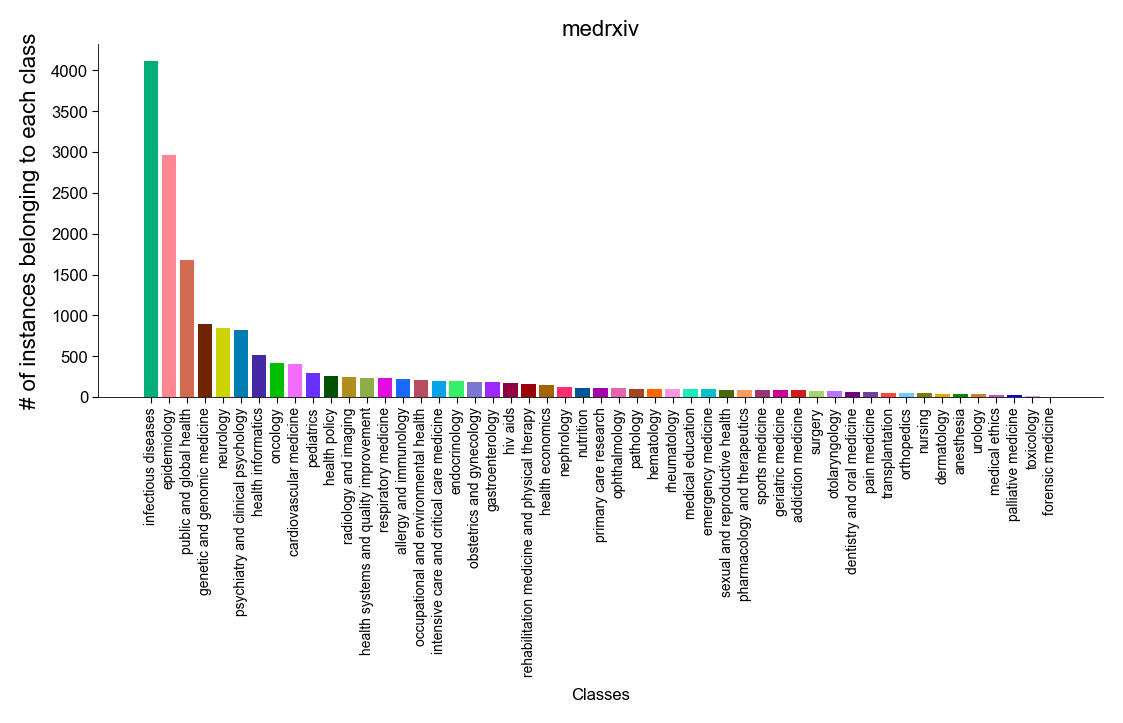

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5.5, 3.5), dpi=200, layout="constrained")

ax.bar(
    np.arange(len(np.unique(labels))),
    np.flip(np.sort(counts)),
    color=np.array(list(dict_label_to_color.values()))[
        np.flip(np.argsort(counts))
    ],
)

ax.set_xticks(
    np.arange(len(np.unique(labels))),
    labels=unique_labels[np.flip(np.argsort(counts))],
    rotation="vertical",
    fontsize=5,
)
ax.set_ylabel("# of instances belonging to each class", fontsize=8)
ax.set_xlabel("Classes")
ax.set_title(f"{dataset_name}")


fig.savefig(figures_path / f"barplot_class_distribution_{dataset_name}.png")

### Reddit

In [ ]:
from datasets import load_dataset

dataset_reddit = load_dataset("mteb/reddit-clustering-p2p")
# dataset_reddit = load_dataset("mteb/stackexchange-clustering-p2p")

In [ ]:
reddit_sentences = np.hstack(
    dataset_reddit.data["test"].to_pandas().sentences.to_numpy()
)

In [ ]:
len(reddit_sentences)

459399

In [ ]:
reddit_labels = np.hstack(
    dataset_reddit.data["test"].to_pandas().labels.to_numpy()
)

In [ ]:
len(reddit_labels)

459399

In [ ]:
unique_labels, counts = np.unique(reddit_labels, return_counts=True)

In [ ]:
unique_labels

array(['1200isplentyketo', '196', '40kLore', '90dayfianceuncensored',
       'ABA', 'ABraThatFits', 'ACTrade', 'ADHD', 'Adopted', 'Aerials',
       'AgonGame', 'AirForce', 'AirReps', 'Aliexpress', 'AmItheAsshole',
       'AmazonFC', 'AmongUs', 'ApplyingToCollege', 'AskAnAmerican',
       'AskCulinary', 'AskGames', 'AskGirls', 'AskLosAngeles', 'AskVet',
       'AssassinsCreedValhala', 'AstroGaming', 'BDSMcommunity', 'BMW',
       'BangaloreMains', 'Bariloche', 'Bath', 'Baystreetbets',
       'BenignExistence', 'Bestbuy', 'Bible', 'BitLifeApp',
       'BlackCountryNewRoad', 'Bogleheads', 'BokunoheroFanfiction',
       'BreakUps', 'BroadCity', 'BuddyCrossing', 'C25K',
       'COVID19positive', 'CPTSD', 'CRISPR', 'CanaryWharfBets', 'Cartalk',
       'Catholicism', 'CharacterRant', 'ChronicPain', 'ClashOfClans',
       'ClashOfClansRecruit', 'Coins4Sale', 'ConnecticutR4R',
       'ConquerorsBlade', 'CozyGrove', 'CreditCards', 'CryptoHorde',
       'CryptoMarkets', 'CryptoMars', 'Crypto_com'

In [ ]:
len(
    [
        "1200isplentyketo",
        "196",
        "40kLore",
        "90dayfianceuncensored",
        "ABA",
        "ABraThatFits",
        "ACTrade",
        "ADHD",
        "Adopted",
        "Aerials",
        "AgonGame",
        "AirForce",
        "AirReps",
        "Aliexpress",
        "AmItheAsshole",
        "AmazonFC",
        "AmongUs",
        "ApplyingToCollege",
        "AskAnAmerican",
        "AskCulinary",
        "AskGames",
        "AskGirls",
        "AskLosAngeles",
        "AskVet",
        "AssassinsCreedValhala",
        "AstroGaming",
        "BDSMcommunity",
        "BMW",
        "BangaloreMains",
        "Bariloche",
        "Bath",
        "Baystreetbets",
        "BenignExistence",
        "Bestbuy",
        "Bible",
        "BitLifeApp",
        "BlackCountryNewRoad",
        "Bogleheads",
        "BokunoheroFanfiction",
        "BreakUps",
        "BroadCity",
        "BuddyCrossing",
        "C25K",
        "COVID19positive",
        "CPTSD",
        "CRISPR",
        "CanaryWharfBets",
        "Cartalk",
        "Catholicism",
        "CharacterRant",
        "ChronicPain",
        "ClashOfClans",
        "ClashOfClansRecruit",
        "Coins4Sale",
        "ConnecticutR4R",
        "ConquerorsBlade",
        "CozyGrove",
        "CreditCards",
        "CryptoHorde",
        "CryptoMarkets",
        "CryptoMars",
        "Crypto_com",
        "CultoftheFranklin",
        "DMAcademy",
        "DestinyTheGame",
        "DissonautUniverse",
        "DnD",
        "Dodocodes",
        "Doom",
        "DotA2",
        "Dyson_Sphere_Program",
        "ELLIPAL_Official",
        "Eldenring",
        "EliteDangerous",
        "EscapefromTarkov",
        "EverMerge",
        "Evernote",
        "FIFA",
        "FanFiction",
        "FiddlesticksMains",
        "FiestaST",
        "FireEmblemHeroes",
        "FitnessDE",
        "FortNiteBR",
        "FortniteCompetitive",
        "FridayNightFunkin",
        "GCXRep",
        "GME",
        "GameBuilderGarage",
        "GameSale",
        "GamingLaptops",
        "Gaming_Headsets",
        "GayYoungOldDating",
        "GearsOfWar",
        "GlobalPowers",
        "GoRVing",
        "GodEater",
        "GoodNotes",
        "GoogleDataStudio",
        "GriefSupport",
        "Gta5Modding",
        "Guitar",
        "GunAccessoriesForSale",
        "HFY",
        "HIMYM",
        "HaircareScience",
        "HauntingOfHillHouse",
        "Hedgehog",
        "HilariaBaldwin",
        "HiveOS",
        "HotWheels",
        "Huel",
        "HyperRP",
        "HypnoFair",
        "IBO",
        "IRS",
        "ITCareerQuestions",
        "InstacartShoppers",
        "JamesHoffmann",
        "JoJolion",
        "Julia",
        "JustUnsubbed",
        "KGBTR",
        "KTM",
        "KassadinMains",
        "Kayaking",
        "KazuhaMains",
        "Kengan_Ashura",
        "KikRoleplay",
        "KillingEve",
        "KingkillerChronicle",
        "LOONA",
        "LeagueConnect",
        "LearnerDriverUK",
        "LegendsOfRuneterra",
        "Library",
        "LifeProTips",
        "LightNovels",
        "MECoOp",
        "MLBTheShow",
        "MachineLearning",
        "Market76",
        "MarsWallStreet",
        "MarylandUnemployment",
        "MatthiasSubmissions",
        "McMaster",
        "MensRights",
        "Midsommar",
        "MindHunter",
        "Minecraft",
        "MinecraftServer",
        "ModelCars",
        "ModernMagic",
        "MondoGore",
        "MonsterHunter",
        "MonsterHunterWorld",
        "MtF",
        "NBA2k",
        "NTU",
        "NameThatSong",
        "NassauCountyHookups",
        "Netherlands",
        "NiceHash",
        "Nioh",
        "NoContract",
        "NoFap",
        "NoFeeAC",
        "NoMansSkyTheGame",
        "OculusQuest",
        "Paladins",
        "PanicAttack",
        "PerkByDaylight",
        "PersonalFinanceCanada",
        "PokemonGoFriends",
        "PokemonHome",
        "PokemonTCG",
        "PoonamPandeyFanatics",
        "Prolactinoma",
        "Random_Acts_Of_Amazon",
        "RedditWritesSeinfeld",
        "Reduction",
        "RepTime",
        "RevenantMain",
        "Revu",
        "RocketLeagueExchange",
        "RoleplayingForReddit",
        "RomanianWolves",
        "SLFmeetups",
        "STAYC",
        "SakuraGakuin",
        "SaltLakeCity",
        "Sat",
        "SatoshiStreetBets",
        "SauceSharingCommunity",
        "Scotch",
        "Screenwriting",
        "ShieldAndroidTV",
        "Shittyaskflying",
        "ShuumatsuNoValkyrie",
        "Sims4",
        "SluttyConfessions",
        "Smallville",
        "SofiawithanF",
        "SquaredCircle",
        "Stormlight_Archive",
        "SummonSign",
        "Superhero_Ideas",
        "Superstonk",
        "Sverigesforsvarsmakt",
        "TMJ",
        "TeensMeetTeens",
        "Testosterone",
        "TheMagnusArchives",
        "TherosDMs",
        "Throwers",
        "Tomorrowland",
        "TooAfraidToAsk",
        "TwoXChromosomes",
        "UKJobs",
        "Unemployment",
        "ValorantBrasil",
        "Vent",
        "VinylCollectors",
        "VirtualYoutubers",
        "WallStreetbetsELITE",
        "Wallstreetsilver",
        "Wavyhair",
        "WetlanderHumor",
        "WhiteWolfRPG",
        "Wordpress",
        "WreckingBallMains",
        "ZombsRoyale",
        "accesscontrol",
        "aggretsuko",
        "alcoholicsanonymous",
        "aliens",
        "amcstock",
        "amex",
        "anime",
        "aorus",
        "apexlegends",
        "appletv",
        "appliancerepair",
        "arlington",
        "aromantic",
        "ask",
        "askTO",
        "askcarsales",
        "askseddit",
        "asktransgender",
        "auntienetwork",
        "bicycling",
        "blackopscoldwar",
        "bleach",
        "boardgames",
        "bonnaroo",
        "bostonr4r",
        "brasil",
        "brave_browser",
        "bravelydefault",
        "breakingmom",
        "buildapc",
        "buildapcforme",
        "candlemagick",
        "capitalism_in_decay",
        "cardano",
        "choiceofgames",
        "chronotrigger",
        "clonewars",
        "comicbooks",
        "comicswap",
        "conspiracy",
        "controlgame",
        "covidlonghaulers",
        "cryptocoins",
        "cryptostreetbets",
        "cscareerquestionsEU",
        "cuboulder",
        "dating",
        "dating_advice",
        "dbrand",
        "deadbydaylight",
        "delhi",
        "depressed",
        "depression",
        "destiny2",
        "detrans",
        "digimon",
        "dirtykikpals",
        "dirtypenpals",
        "dogecoin",
        "doordash_drivers",
        "dpdr",
        "dragonquest",
        "dreamsmp",
        "emacs",
        "emotestories",
        "endocrinology",
        "eu4",
        "exalted",
        "exjw",
        "exmuslim",
        "extrarfl",
        "facebook",
        "fantasywriters",
        "feedthebeast",
        "feminineboys",
        "findaleague",
        "fleshlight",
        "foodscience",
        "gamegrumps",
        "gaming",
        "gardening",
        "generationology",
        "gonewildaudio",
        "gorillaz",
        "graylog",
        "haskell",
        "help",
        "heroesofthestorm",
        "hisdarkmaterials",
        "hitbtc",
        "hoi4",
        "ibs",
        "idlechampions",
        "idleon",
        "igcse",
        "imaginarypenpals",
        "islam",
        "kansascity",
        "kdramarecommends",
        "kingofqueens",
        "ladybusiness",
        "langrisser",
        "lasers",
        "lawschooladmissions",
        "leafs",
        "leagueoflegends",
        "learnmath",
        "lfg",
        "libraryofruina",
        "livesound",
        "lockpicking",
        "logh",
        "mac",
        "madisonwi",
        "masseffect",
        "mechmarket",
        "metalgearsolid",
        "mfdoom",
        "miraculousladybug",
        "namenerds",
        "nanocurrency",
        "newtothenavy",
        "nhl",
        "nus",
        "obs",
        "oculus",
        "offmychest",
        "oneui",
        "onewheel",
        "overlord",
        "paintdotnet",
        "passive_income",
        "photography",
        "piano",
        "pittsburgh",
        "playstation",
        "podcasts",
        "pokemon",
        "popperpigs",
        "premed",
        "ps3homebrew",
        "puppy101",
        "qBittorrent",
        "quittingkratom",
        "raisedbynarcissists",
        "raleigh",
        "realonlyfansreviews",
        "redsox",
        "relationship_advice",
        "religion",
        "roblox",
        "royalfamily",
        "rpg",
        "salesforce",
        "samsung",
        "scatstories",
        "screenplaychallenge",
        "seduction",
        "self",
        "selfimprovement",
        "seoul",
        "sex",
        "sexstories",
        "silverbugbets",
        "sissypersonals",
        "skincareexchange",
        "snuffrp",
        "socialanxiety",
        "sofi",
        "software",
        "spirituality",
        "stalker",
        "starcraft2coop",
        "stashinvest",
        "steelseries",
        "steinsgate",
        "stocks",
        "suggestmeabook",
        "survivinginfidelity",
        "tarot",
        "techsupport",
        "teenagers",
        "teenagersnew",
        "texas",
        "tf2trade",
        "thedivision",
        "theta_network",
        "thetagang",
        "thomasthetankengine",
        "tipofmypenis",
        "tipofmytongue",
        "tomorrow",
        "touhou",
        "trakstocks",
        "transgendercirclejerk",
        "transpositive",
        "turo",
        "turtles",
        "tutanota",
        "u_mawadom118",
        "ugly",
        "unpopularopinion",
        "vaginismus",
        "vcu",
        "visualization",
        "watercooling",
        "weather",
        "whatcarshouldIbuy",
        "whatsthatbook",
        "whowouldwin",
        "wicked_edge",
        "wireshark",
        "xbox",
        "xboxfindfriends",
        "xmen",
        "xmpp",
        "yoga",
        "youtubers",
    ]
)

450

In [ ]:
dataset_name = "reddit"
colors = np.load(
    variables_path / "updated_dataset" / f"colors_{dataset_name}.npy"
)
pickle_in = open(
    variables_path
    / "updated_dataset"
    / f"dict_label_to_color_{dataset_name}.pkl",
    "rb",
)
dict_label_to_color = pickle.load(pickle_in)

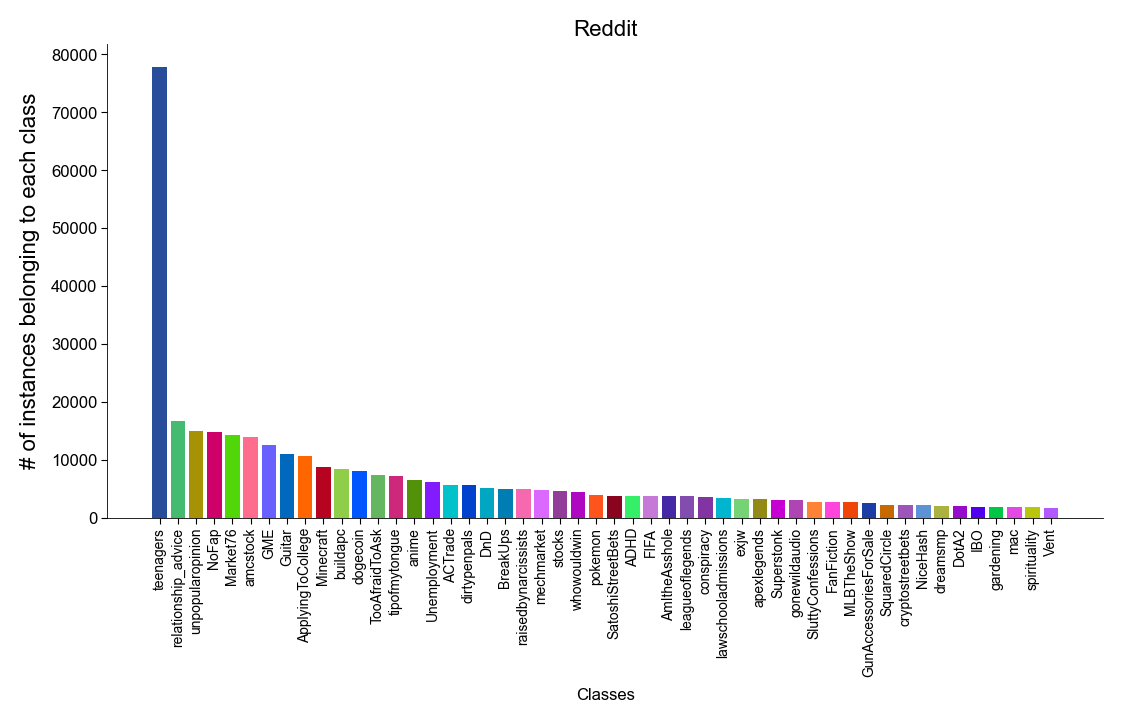

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5.5, 3.5), dpi=200, layout="constrained")
n = 50
ax.bar(
    np.arange(n),
    np.flip(np.sort(counts))[:n],
    color=np.array(list(dict_label_to_color.values()))[
        np.flip(np.argsort(counts))
    ],
)

ax.set_xticks(
    np.arange(n),
    labels=unique_labels[np.flip(np.argsort(counts))[:n]],
    rotation="vertical",
    fontsize=5,
)
ax.set_ylabel("# of instances belonging to each class", fontsize=8)
ax.set_xlabel("Classes")
ax.set_title("Reddit")


fig.savefig(figures_path / "barplot_class_distribution_reddit.png")

### ICLR

In [ ]:
# %%time
# iclr2024 = pd.read_parquet(
#     data_path / "iclr2024.parquet.gzip",
#     # index=False,
#     engine="pyarrow",
#     # compression="gzip",
# )

In [ ]:
labels_iclr = np.load(variables_path / "updated_dataset" / "labels_iclr.npy")
colors_iclr = np.load(variables_path / "updated_dataset" / "colors_iclr.npy")

pickle_in = open(
    variables_path / "updated_dataset" / "dict_label_to_color.pkl", "rb"
)
dict_label_to_color = pickle.load(pickle_in)

In [ ]:
dict_label_to_color

{'CNNs': '#d21820',
 'GANs': '#1869ff',
 'RNNs': '#008a00',
 'ViTs': '#f36dff',
 'active learning': '#710079',
 'adversarial': '#eba600',
 'anomaly detection': '#00bec2',
 'autoencoders': '#5d3d04',
 'causality': '#005559',
 'clustering': '#45ef3d',
 'compression': '#a2aeff',
 'continual learning': '#ff8e92',
 'contrastive learning': '#9e6586',
 'diffusion models': '#9e28ff',
 'explainability': '#8eae75',
 'fairness': '#aa6d35',
 'federated learning': '#791028',
 'few-shot learning': '#3d3986',
 'graphs': '#f71c96',
 'imitation learning': '#005114',
 'in-context learning': '#55829a',
 'interpretability': '#ff6500',
 'knowledge distillation': '#009271',
 'language models': '#c200c2',
 'llms': '#31ebb2',
 'meta learning': '#e7b6e7',
 'model-based reinforcement learning': '#656d31',
 'multi-agent reinforcement learning': '#8a79ba',
 'multi-task learning': '#08aaf3',
 'neural architecture search': '#c6d20c',
 'object detection': '#ae0069',
 'offline RL': '#9e8e00',
 'optimal transport': '#

In [ ]:
print("# samples", len(labels_iclr))
print("# classes", len(np.unique(labels_iclr)))

# samples 24347
# classes 46


In [ ]:
unique_labels, counts = np.unique(labels_iclr, return_counts=True)

In [ ]:
unique_colors = np.vectorize(dict_label_to_color.get)(
    unique_labels[np.flip(np.argsort(counts))]
)

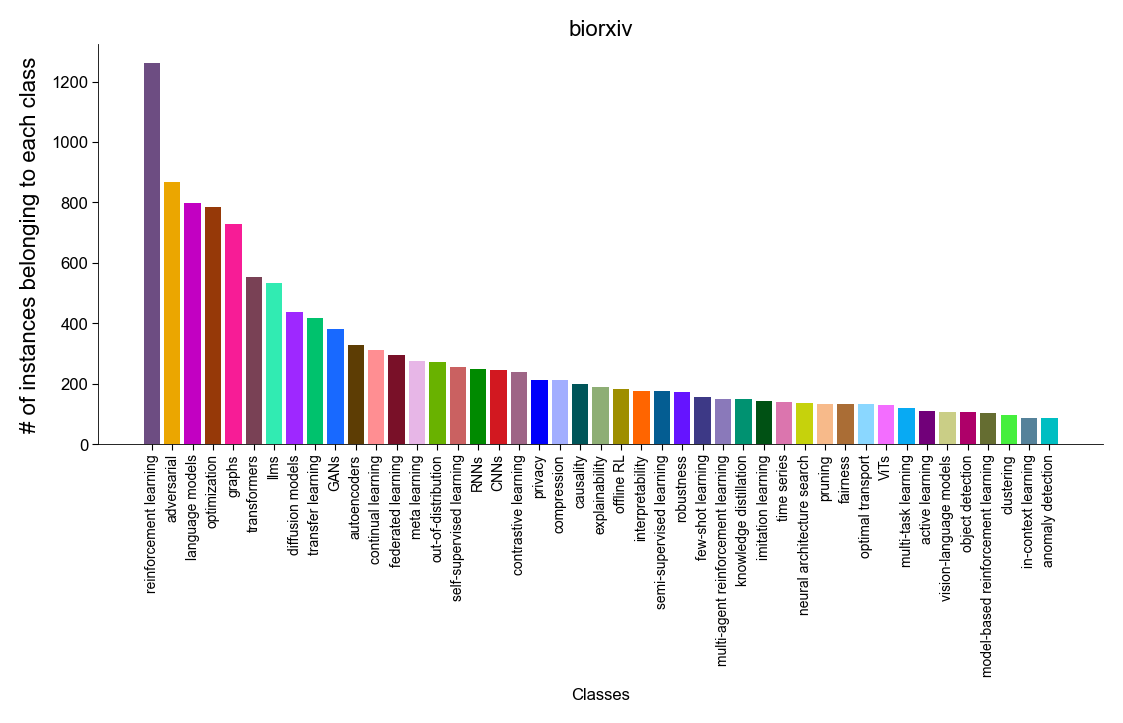

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5.5, 3.5), dpi=200, layout="constrained")

ax.bar(
    np.arange(len(np.unique(labels_iclr)))[1:],
    np.flip(np.sort(counts))[1:],
    color=unique_colors[1:],
)

ax.set_xticks(
    np.arange(len(np.unique(labels_iclr)))[1:],
    labels=unique_labels[np.flip(np.argsort(counts))][1:],
    rotation="vertical",
    fontsize=5,
)
ax.set_ylabel("# of instances belonging to each class", fontsize=8)
ax.set_xlabel("Classes")
ax.set_title(f"{dataset_name}")


fig.savefig(figures_path / f"barplot_class_distribution_iclr_v2.png")

### StackExchange

In [ ]:
dataset_name = "stackexchange"
dataset_path = "mteb/stackexchange-clustering-p2p"

In [ ]:
dataset = load_dataset(dataset_path)

In [ ]:
dataset

DatasetDict({
    test: Dataset({
        features: ['sentences', 'labels'],
        num_rows: 10
    })
})

In [ ]:
sentences = list(
    np.hstack(dataset.data["test"].to_pandas().sentences.to_numpy())
)
labels = list(np.hstack(dataset.data["test"].to_pandas().labels.to_numpy()))

In [ ]:
print("# samples", len(labels))
print("# classes", len(np.unique(labels)))

# samples 75000
# classes 610


In [ ]:
unique_labels, counts = np.unique(labels, return_counts=True)

In [ ]:
unique_labels

array(['.net', '2.5d', '2d', '3d', '3d-meshes', '3d-modeling', '3dsmax',
       'aabb', 'accessibility', 'actionscript', 'actionscript-3',
       'adventure-game-studio', 'adventure-games', 'advertisements', 'ai',
       'ajax', 'algorithm', 'allegro', 'alpha', 'alpha-blending',
       'analytics', 'andengine', 'android', 'android-studio',
       'angelscript', 'angles', 'animation', 'anti-cheat', 'antialiasing',
       'appstore', 'architecture', 'arma3', 'art', 'artemis',
       'aspect-ratio', 'assembly', 'asset-management', 'assets', 'assimp',
       'audio', 'augmented-reality', 'authentication', 'automation',
       'avatar', 'awesomium', 'babylonjs', 'balance',
       'barycentric-coordinates', 'behavior', 'behavior-tree', 'beta',
       'beziers', 'blender', 'blender-game-engine', 'board-game', 'books',
       'bot', 'bounding-boxes', 'bounding-spheres', 'box2d', 'browser',
       'browser-based-games', 'bsp', 'bukkit', 'bullet-physics',
       'business', 'business-model', 'c'

In [ ]:
dataset_name = "stackexchange"
colors = np.load(
    variables_path / "updated_dataset" / f"colors_{dataset_name}.npy"
)
pickle_in = open(
    variables_path
    / "updated_dataset"
    / f"dict_label_to_color_{dataset_name}.pkl",
    "rb",
)
dict_label_to_color = pickle.load(pickle_in)

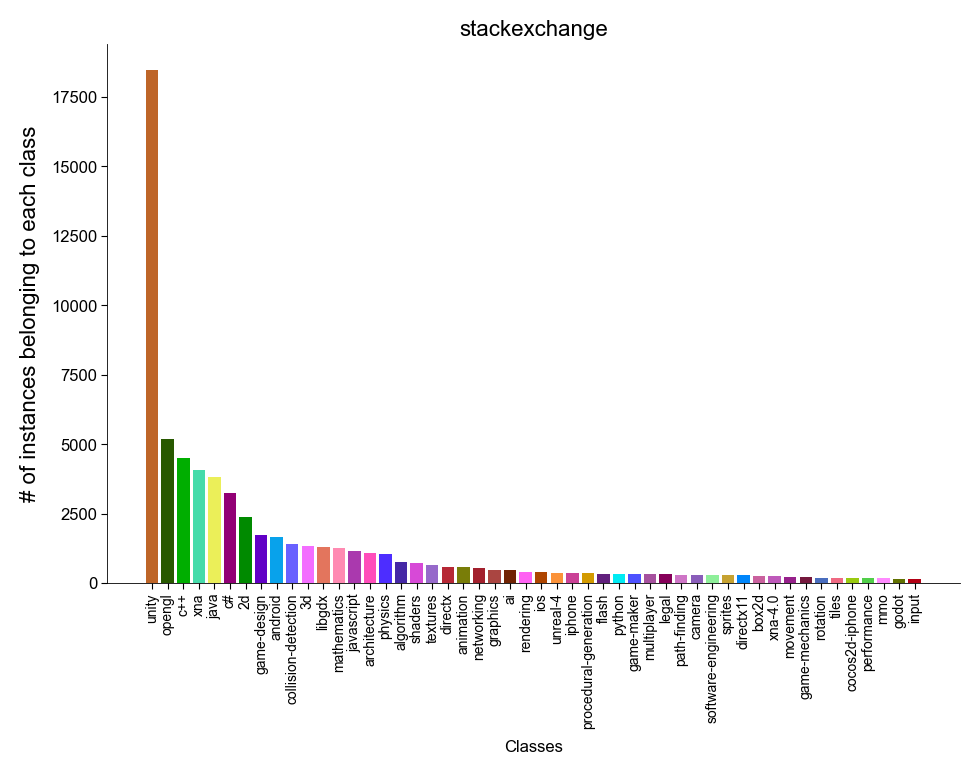

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5.5, 3.5), dpi=200)
n = 50
ax.bar(
    np.arange(n),
    np.flip(np.sort(counts))[:n],
    color=np.array(list(dict_label_to_color.values()))[
        np.flip(np.argsort(counts))
    ],
)

ax.set_xticks(
    np.arange(n),
    labels=unique_labels[np.flip(np.argsort(counts))[:n]],
    rotation="vertical",
    fontsize=5,
)
ax.set_ylabel("# of instances belonging to each class", fontsize=8)
ax.set_xlabel("Classes")
ax.set_title(f"{dataset_name}")


fig.savefig(figures_path / f"barplot_class_distribution_{dataset_name}.png")

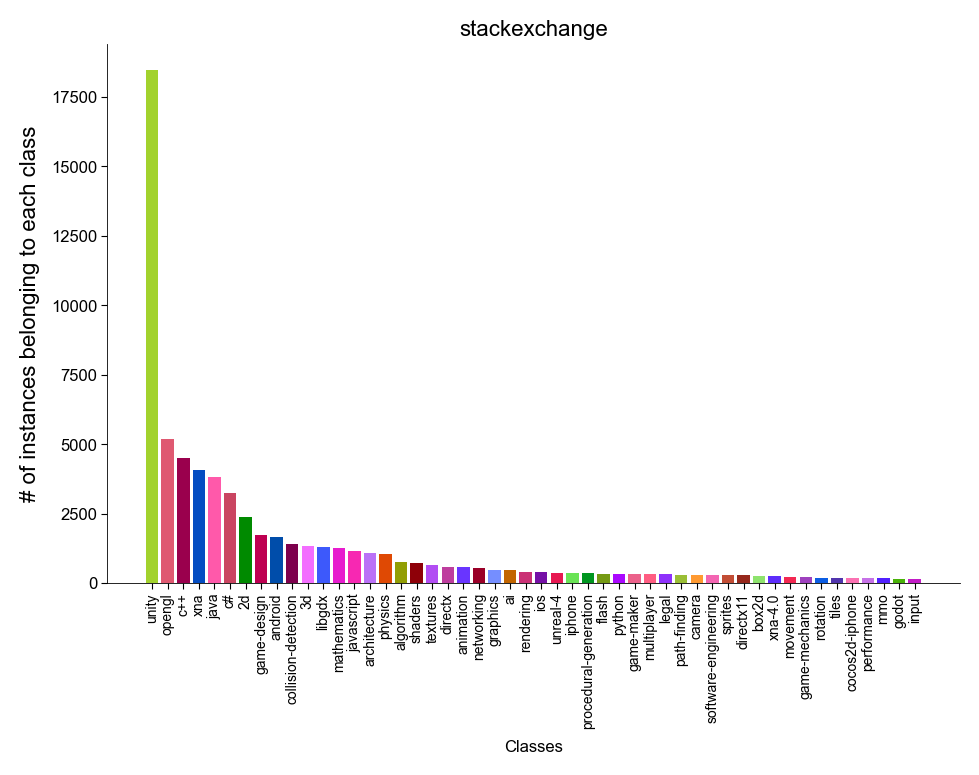

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(5.5, 3.5), dpi=200)
n = 50
ax.bar(
    np.arange(n),
    np.flip(np.sort(counts))[:n],
    color=np.array(list(dict_label_to_color.values()))[
        np.flip(np.argsort(counts))
    ],
)

ax.set_xticks(
    np.arange(n),
    labels=unique_labels[np.flip(np.argsort(counts))[:n]],
    rotation="vertical",
    fontsize=5,
)
ax.set_ylabel("# of instances belonging to each class", fontsize=8)
ax.set_xlabel("Classes")
ax.set_title(f"{dataset_name}")


fig.savefig(figures_path / f"barplot_class_distribution_{dataset_name}.png")

# Print MTEB datasets results -- move to notebook 29

In [ ]:
datasets_names = ["biorxiv", "medrxiv", "reddit", "stackexchange"]

In [ ]:
for elem in datasets_names:
    print(elem, ", ")

biorxiv , 
medrxiv , 
reddit , 
stackexchange , 


In [ ]:
model_names = [
    "MPNet",
    "SimCSE",
    "SBERT",
    "SPECTER",
    "SciNCL",
]

# model_paths = [
#     "microsoft/mpnet-base",
#     "princeton-nlp/unsup-simcse-bert-base-uncased",
#     "sentence-transformers/all-mpnet-base-v2",
# ]

In [ ]:
# load
from json import load


results = pd.DataFrame(
    # columns=["MPNet", "Crops", "Dropout", "SimCSE", "SBERT"],
    columns=[
        "MPNet",
        "SimCSE",
        "SPECTER",
        "SciNCL",
        "EmbddR",
        "EmbddR10",
        "RandomBERT",
        "RandomBERT10",
        "Dropout",
        "Crops",
        "SBERT",
        "TF-IDF",
        "SVD",
        "L2(SVD)",
    ],
    index=datasets_names,
)
for dataset_name in datasets_names:
    # baseline
    for model_name in model_names:
        saving_path = Path("embeddings_" + model_name.lower()) / Path(
            f"updated_dataset/mteb_datasets/{dataset_name}"
        )

        results[model_name].loc[dataset_name] = np.load(
            variables_path / saving_path / "knn_accuracies_baseline.npy",
        )[0]

    # fine tuned models
    saving_path = Path("embeddings_mpnet") / Path(
        f"updated_dataset/mteb_datasets/{dataset_name}"
    )
    results["Crops"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run1.npy",
    )[0][0]

    # dropout
    results["Dropout"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run2.npy",
    )[0][0]

    # embedding layer
    saving_path = Path("embeddings_random_bert") / Path(
        f"updated_dataset/embedding_layer_experiment/mteb_datasets/{dataset_name}"
    )
    results["EmbddR"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run3.npy",
    )[0][0]
    results["EmbddR10"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run3_10_epochs.npy",
    )[-1][0]

    # random BERT
    saving_path = Path("embeddings_random_bert") / Path(
        f"updated_dataset/mteb_datasets/{dataset_name}"
    )
    results["RandomBERT"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run5.npy",
    )[0][
        0
    ]  # CHANGE TO -1 WHEN FINISHED
    results["RandomBERT10"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run5.npy",
    )[-1][0]

    # TF-IDF
    results["TF-IDF"].loc[dataset_name] = np.load(
        variables_path
        / "updated_dataset"
        / f"knn_accuracy_tfidf_svd_l2_{dataset_name}.npy",
    )[0]
    results["SVD"].loc[dataset_name] = np.load(
        variables_path
        / "updated_dataset"
        / f"knn_accuracy_tfidf_svd_l2_{dataset_name}.npy",
    )[1]
    results["L2(SVD)"].loc[dataset_name] = np.load(
        variables_path
        / "updated_dataset"
        / f"knn_accuracy_tfidf_svd_l2_{dataset_name}.npy",
    )[2]

In [ ]:
results.loc["ICLR"] = np.zeros(len(results.iloc[0]))
results_iclr = {
    "MPNet": 0.374,
    "SimCSE": 0.457,
    "SciNCL": 0.570,
    "SPECTER": 0.568,
    "EmbddR": 0.548,  # already updated values with only layer (not module)
    "EmbddR10": 0.573,  # already updated values with only layer (not module)
    "RandomBERT": 0.471,  # !
    "RandomBERT10": 0.571,  # !
    "Dropout": 0.468,
    "Crops": 0.589,
    "SBERT": 0.633,
    "TF-IDF": 0.600,
    "SVD": 0.606,
    "L2(SVD)": 0.624,
}

for key, value in results_iclr.items():
    results.loc["ICLR"][key] = value

In [ ]:
# add Arxiv
dataset_name = "arxiv"
# baseline

results.loc["arxiv_main"] = np.zeros(len(results.iloc[0]))
results.loc["arxiv_secondary"] = np.zeros(len(results.iloc[0]))

for model_name in model_names:
    saving_path = Path("embeddings_" + model_name.lower()) / Path(
        f"updated_dataset/mteb_datasets/{dataset_name}"
    )

    results[model_name].loc["arxiv_main"] = np.load(
        variables_path / saving_path / "knn_accuracies_baseline_main.npy",
    )[0]
    results[model_name].loc["arxiv_secondary"] = np.load(
        variables_path / saving_path / "knn_accuracies_baseline_secondary.npy",
    )[0]

# fine tuned models
saving_path = Path("embeddings_mpnet") / Path(
    f"updated_dataset/mteb_datasets/{dataset_name}"
)
results["Crops"].loc["arxiv_main"] = np.load(
    variables_path / saving_path / "knn_accuracies_run1_main.npy",
)[0][0]
results["Crops"].loc["arxiv_secondary"] = np.load(
    variables_path / saving_path / "knn_accuracies_run1_secondary.npy",
)[0]


# dropout
results["Dropout"].loc["arxiv_main"] = np.load(
    variables_path / saving_path / "knn_accuracies_run2_main.npy",
)[0][0]
results["Dropout"].loc["arxiv_secondary"] = np.load(
    variables_path / saving_path / "knn_accuracies_run2_secondary.npy",
)[0]

# embedding layer
saving_path = Path("embeddings_random_bert") / Path(
    f"updated_dataset/embedding_layer_experiment/mteb_datasets/{dataset_name}"
)
results["EmbddR"].loc["arxiv_main"] = np.load(
    variables_path / saving_path / "knn_accuracies_run3_main.npy",
)[0][0]
results["EmbddR"].loc["arxiv_secondary"] = np.load(
    variables_path / saving_path / "knn_accuracies_run3_secondary.npy",
)[0]
results["EmbddR10"].loc["arxiv_main"] = np.load(
    variables_path / saving_path / "knn_accuracies_run3_10_epochs_main.npy",
)[0][0]
results["EmbddR10"].loc["arxiv_secondary"] = np.load(
    variables_path
    / saving_path
    / "knn_accuracies_run3_10_epochs_secondary.npy",
)[0]

# RandomBERT
saving_path = Path("embeddings_random_bert") / Path(
    f"updated_dataset/mteb_datasets/{dataset_name}"
)
results["RandomBERT"].loc["arxiv_main"] = np.load(
    variables_path / saving_path / "knn_accuracies_run5_main.npy",
)[0][0]
results["RandomBERT"].loc["arxiv_secondary"] = np.load(
    variables_path / saving_path / "knn_accuracies_run5_secondary.npy",
)[0]
results["RandomBERT10"].loc["arxiv_main"] = np.load(
    variables_path / saving_path / "knn_accuracies_run5_main.npy",
)[-1][0]
results["RandomBERT10"].loc["arxiv_secondary"] = np.load(
    variables_path / saving_path / "knn_accuracies_run5_secondary.npy",
)[-1]

# TF-IDF
results["TF-IDF"].loc["arxiv_main"] = np.load(
    variables_path
    / "updated_dataset"
    / f"knn_accuracy_tfidf_svd_l2_{dataset_name}_main.npy",
)[0]
results["TF-IDF"].loc["arxiv_secondary"] = np.load(
    variables_path
    / "updated_dataset"
    / f"knn_accuracy_tfidf_svd_l2_{dataset_name}_secondary.npy",
)[0]
results["SVD"].loc["arxiv_main"] = np.load(
    variables_path
    / "updated_dataset"
    / f"knn_accuracy_tfidf_svd_l2_{dataset_name}_main.npy",
)[1]
results["SVD"].loc["arxiv_secondary"] = np.load(
    variables_path
    / "updated_dataset"
    / f"knn_accuracy_tfidf_svd_l2_{dataset_name}_secondary.npy",
)[1]
results["L2(SVD)"].loc["arxiv_main"] = np.load(
    variables_path
    / "updated_dataset"
    / f"knn_accuracy_tfidf_svd_l2_{dataset_name}_main.npy",
)[2]
results["L2(SVD)"].loc["arxiv_secondary"] = np.load(
    variables_path
    / "updated_dataset"
    / f"knn_accuracy_tfidf_svd_l2_{dataset_name}_secondary.npy",
)[2]

In [ ]:
results

,MPNet,SimCSE,SPECTER,SciNCL,EmbddR,EmbddR10,RandomBERT,RandomBERT10,Dropout,Crops,SBERT,TF-IDF,SVD,L2(SVD)
biorxiv,0.586168,0.590444,0.648076,0.663692,0.59063,0.607362,0.528351,0.605689,0.606804,0.617773,0.652352,0.606618,0.609593,0.625023
medrxiv,0.435127,0.471955,0.526346,0.528045,0.46289,0.491218,0.390935,0.448725,0.47762,0.523513,0.567705,0.520113,0.487819,0.528612
reddit,0.626426,0.599456,0.552003,0.572769,0.583544,0.636308,0.43744,0.618198,0.577993,0.719634,0.749913,0.195538,0.470331,0.49458
stackexchange,0.392933,0.407467,0.414533,0.429333,0.436,0.452133,0.412267,0.454133,0.415733,0.456133,0.5056,0.475333,0.458667,0.456133
ICLR,0.374,0.457,0.568,0.57,0.548,0.573,0.471,0.571,0.468,0.589,0.633,0.6,0.606,0.624
arxiv_main,0.692124,0.710535,0.748502,0.75508,0.70775,0.718901,0.728618,0.752815,0.704257,0.748871,0.760198,0.744967,0.705594,0.717113
arxiv_secondary,0.377915,0.400188,0.4418,0.451749,0.399233,0.433748,0.446058,0.443233,0.399192,0.442318,0.461548,0.443943,0.39997,0.405224


In [ ]:
results = results.astype(float).round(3)

results[
    [
        "MPNet",
        "SimCSE",
        "SPECTER",
        "SciNCL",
        "SBERT",
        "Crops",
        "Dropout",
        "EmbddR10",
        "RandomBERT10",
    ]
] * 100

# print(
#     results[
#         [
#             "MPNet",
#             "SimCSE",
#             "SPECTER",
#             "SciNCL",
#             "SBERT",
#             "Crops",
#             "Dropout",
#             "EmbddR10",
#             "RandomBERT10",
#         ]
#     ]
#     * 100
# )

,MPNet,SimCSE,SPECTER,SciNCL,SBERT,Crops,Dropout,EmbddR10,RandomBERT10
biorxiv,58.6,59.0,64.8,66.4,65.2,61.8,60.7,60.7,60.6
medrxiv,43.5,47.2,52.6,52.8,56.8,52.4,47.8,49.1,44.9
reddit,62.6,59.9,55.2,57.3,75.0,72.0,57.8,63.6,61.8
stackexchange,39.3,40.7,41.5,42.9,50.6,45.6,41.6,45.2,45.4
ICLR,37.4,45.7,56.8,57.0,63.3,58.9,46.8,57.3,57.1
arxiv_main,69.2,71.1,74.9,75.5,76.0,74.9,70.4,71.9,75.3
arxiv_secondary,37.8,40.0,44.2,45.2,46.2,44.2,39.9,43.4,44.3


In [ ]:
results[
    [
        "MPNet",
        "SimCSE",
        "SPECTER",
        "SciNCL",
        "SBERT",
        "Crops",
        "Dropout",
        "EmbddR10",
        "RandomBERT10",
    ]
].mean(axis=0).round(3) * 100

MPNet           49.8
SimCSE          51.9
SPECTER         55.7
SciNCL          56.7
SBERT           61.9
Crops           58.5
Dropout         52.1
EmbddR10        55.9
RandomBERT10    55.6
dtype: float64

In [ ]:
49.8 & 51.9 & 55.7 & 56.7 & 61.9 & 58.5 & 52.1 & 55.9 & 55.6 

In [ ]:
print((results.Crops - results.SPECTER) * 100)
print((results.Crops - results.SciNCL) * 100)
print(np.mean((results.Crops - results.SPECTER) * 100))
print(np.mean((results.Crops - results.SciNCL) * 100))

biorxiv            -3.0
medrxiv            -0.2
reddit             16.8
stackexchange       4.1
ICLR                2.1
arxiv_main          0.0
arxiv_secondary     0.0
dtype: float64
biorxiv            -4.6
medrxiv            -0.4
reddit             14.7
stackexchange       2.7
ICLR                1.9
arxiv_main         -0.6
arxiv_secondary    -1.0
dtype: float64
2.8285714285714283
1.8142857142857147


In [ ]:
print((results.SBERT - results.Crops) * 100)
print(np.mean((results.SBERT - results.Crops) * 100))

biorxiv            3.4
medrxiv            4.4
reddit             3.0
stackexchange      5.0
ICLR               4.4
arxiv_main         1.1
arxiv_secondary    2.0
dtype: float64
3.328571428571429


In [ ]:
print((results.Crops - results.RandomBERT10) * 100)
print(np.mean((results.Crops - results.RandomBERT10) * 100))

biorxiv             1.2
medrxiv             7.5
reddit             10.2
stackexchange       0.2
ICLR                1.8
arxiv_main         -0.4
arxiv_secondary    -0.1
dtype: float64
2.914285714285714


In [ ]:
print((results.Crops - results.EmbddR10) * 100)
print(np.mean((results.Crops - results.EmbddR10) * 100))

biorxiv            1.1
medrxiv            3.3
reddit             8.4
stackexchange      0.4
ICLR               1.6
arxiv_main         3.0
arxiv_secondary    0.8
dtype: float64
2.657142857142858


In [ ]:
np.mean([-4.6, -0.4, 1.9, -0.6, -1.0])

-0.9400000000000001

In [ ]:
np.mean([-3.0, -0.2, 2.1, 0.0, 0.0])

-0.22000000000000003

In [ ]:
# LATEX TABLE
                 & MPNet &  SimCSE &  SPECTER &  SciNCL &  SBERT &  Crops &  Dropout &  EmbddR10 &  RandomBERT10 \\
\midrule  
ICLR              & 37.4\% &  45.7\% &  56.8\% &  57.0\% &  63.3\% &  58.9\%  &  46.8\% &  57.3\%  &  57.1\% \\   
arxiv_secondary   & 37.8\% &  40.0\% &  44.2\% &  45.2\% &  46.2\% &  44.2\%  &  39.9\% &  43.4\%  &  44.3\% \\  
biorxiv           & 58.6\% &  59.0\% &  64.8\% &  66.4\% &  65.2\% &  61.8\%  &  60.7\% &  60.7\%  &  60.6\% \\  
medrxiv           & 43.5\% &  47.2\% &  52.6\% &  52.8\% &  56.8\% &  52.4\%  &  47.8\% &  49.1\%  &  44.9\% \\  
reddit            & 62.6\% &  59.9\% &  55.2\% &  57.3\% &  75.0\% &  72.0\%  &  57.8\% &  63.6\%  &  61.8\% \\  
stackexchange     & 39.3\% &  40.7\% &  41.5\% &  42.9\% &  50.6\% &  45.6\%  &  41.6\% &  45.2\%  &  45.4\% \\  


In [ ]:
# improvement_results = results.copy(deep=True)
improvement_results = results[
    [
        "MPNet",
        "SimCSE",
        "SPECTER",
        "SciNCL",
        "SBERT",
        "Crops",
        "Dropout",
        "EmbddR10",
        "RandomBERT10",
    ]
].copy(deep=True)

In [ ]:
def normalize_intervals(col):
    norm_col = col - results.MPNet  # / (results.SBERT - results.MPNet) * 100
    return norm_col

In [ ]:
improvement_results = improvement_results.apply(normalize_intervals, axis=0)
improvement_results = improvement_results.astype(float).round(3)
improvement_results * 100

,MPNet,SimCSE,SPECTER,SciNCL,SBERT,Crops,Dropout,EmbddR10,RandomBERT10
biorxiv,0.0,0.4,6.2,7.8,6.6,3.2,2.1,2.1,2.0
medrxiv,0.0,3.7,9.1,9.3,13.3,8.9,4.3,5.6,1.4
reddit,0.0,-2.7,-7.4,-5.3,12.4,9.4,-4.8,1.0,-0.8
stackexchange,0.0,1.4,2.2,3.6,11.3,6.3,2.3,5.9,6.1
ICLR,0.0,8.3,19.4,19.6,25.9,21.5,9.4,19.9,19.7
arxiv_main,0.0,1.9,5.7,6.3,6.8,5.7,1.2,2.7,6.1
arxiv_secondary,0.0,2.2,6.4,7.4,8.4,6.4,2.1,5.6,6.5


In [ ]:
print(np.mean(improvement_results.Dropout * 100))
print(np.std(improvement_results.Dropout * 100))

2.3714285714285714
3.892745738903981


In [ ]:
print(np.mean(improvement_results.Crops * 100))
print(np.std(improvement_results.Crops * 100))

8.77142857142857
5.537331560989149


In [ ]:
print(results * 100)

                 MPNet  SimCSE  SPECTER  SciNCL  EmbddR  EmbddR10  RandomBERT  \
biorxiv           58.6    59.0     64.8    66.4    59.1      60.7        50.7   
medrxiv           43.5    47.2     52.6    52.8    46.3      49.1        38.8   
reddit            62.6    59.9     55.2    57.3    58.4      63.6        43.7   
stackexchange     39.3    40.7     41.5    42.9    43.6      45.2        40.9   
ICLR              37.4    45.7     56.8    57.0    54.8      57.3        47.1   
arxiv_main        69.2    71.1     74.9    75.5    70.8      71.9        72.9   
arxiv_secondary   37.8    40.0     44.2    45.2    39.9      43.4        44.6   

                 Dropout  Crops  SBERT  TF-IDF   SVD  L2(SVD)  
biorxiv             60.7   61.8   65.2    60.7  61.0     62.5  
medrxiv             47.8   52.4   56.8    52.0  48.8     52.9  
reddit              57.8   72.0   75.0    19.6  47.0     49.5  
stackexchange       41.6   45.6   50.6    47.5  45.9     45.6  
ICLR                46.8   58.9

In [ ]:
Dataset          &  MPNet &  SimCSE &  SPECTER &  SciNCL &  EmbddR &  EmbddR10 &  RandomBERT &  Dropout &  Crops &  SBERT &  L2(SVD) \\
\midrule 
ICLR            &  37.4\%  &  45.7\%  &   56.8\%  &  57.0\%  &  54.8\%  &   57.3\%   &   47.1\%  &   46.8\%  &   58.9\%  &  63.3\%  &  62.4\%  \\
arxiv           &  37.8\%  &  40.0\%  &   44.2\%  &  45.2\%  &  39.9\%  &   43.4\%   &   44.6\%  &   39.9\%  &   44.2\%  &  46.2\%  &  40.5\%  \\  
biorxiv         &  58.6\%  &  59.0\%  &   64.8\%  &  66.4\%  &  59.1\%  &   60.7\%   &   50.7\%  &   60.7\%  &   61.8\%  &  65.2\%  &  62.5\%  \\   
medrxiv         &  43.5\%  &  47.2\%  &   52.6\%  &  52.8\%  &  46.3\%  &   49.1\%   &   38.8\%  &   47.8\%  &   52.4\%  &  56.8\%  &  52.9\%  \\   
reddit          &  62.6\%  &  59.9\%  &   55.2\%  &  57.3\%  &  58.4\%  &   63.6\%   &   43.7\%  &   57.8\%  &   72.0\%  &  75.0\%  &  49.5\%  \\   
stackexchange   &  39.3\%  &  40.7\%  &   41.5\%  &  42.9\%  &  43.6\%  &   45.2\%   &   40.9\%  &   41.6\%  &   45.6\%  &  50.6\%  &  45.6\%  \\   
      
 



In [ ]:
print(improvement_results * 100)

                 MPNet  SimCSE  SPECTER  SciNCL  EmbddR  EmbddR10  RandomBERT  \
biorxiv            0.0     0.4      6.2     7.8     0.5       2.1        -7.9   
medrxiv            0.0     3.7      9.1     9.3     2.8       5.6        -4.7   
reddit             0.0    -2.7     -7.4    -5.3    -4.2       1.0       -18.9   
stackexchange      0.0     1.4      2.2     3.6     4.3       5.9         1.6   
ICLR               0.0     8.3     19.4    19.6    17.4      19.9         9.7   
arxiv_main         0.0     1.9      5.7     6.3     1.6       2.7         3.7   
arxiv_secondary    0.0     2.2      6.4     7.4     2.1       5.6         6.8   

                 Dropout  Crops  SBERT  TF-IDF   SVD  L2(SVD)  
biorxiv              2.1    3.2    6.6     2.1   2.4      3.9  
medrxiv              4.3    8.9   13.3     8.5   5.3      9.4  
reddit              -4.8    9.4   12.4   -43.0 -15.6    -13.1  
stackexchange        2.3    6.3   11.3     8.2   6.6      6.3  
ICLR                 9.4   21.5

In [ ]:
abstract_paper = "In NLP, sentence embeddings are crucial for many tasks such as information retrieval, classification, clustering, or visualizing collections of texts. Currently, top-performing sentence embeddings are derived from transformer models fine-tuned through extensive supervised training on large datasets, unlike computer vision where self-supervised training has demonstrated remarkable success. In this work we show that self-supervision suffices to produce high-quality sentence embeddings, with a quality slightly below those from supervised models, but with small qualitative differences on downstream tasks. We compare different augmentation strategies for positive pair generation and show that the embeddings quality is significantly higher when using crops than when using dropout-based augmentations, contrary to previously believed. We go beyond and investigate the minimal architecture needed to achieve a decent sentence representation, and show comparable results when fine-tuning only a random embedding layer, without any attention mechanisms or pretraining information. We also study the mechanics of the training process, observing qualitative differences to self-supervised learning in computer vision."
print(len(abstract_paper))

1216


## Rebuttal

In [ ]:
datasets_names = ["biorxiv", "medrxiv", "reddit", "stackexchange"]

In [ ]:
for elem in datasets_names:
    print(elem, ", ")

biorxiv , 
medrxiv , 
reddit , 
stackexchange , 


In [ ]:
model_names = [
    "MPNet",
    # "SimCSE",
    "SBERT",
    # "SPECTER",
    # "SciNCL",
]

# model_paths = [
#     "microsoft/mpnet-base",
#     "princeton-nlp/unsup-simcse-bert-base-uncased",
#     "sentence-transformers/all-mpnet-base-v2",
# ]

In [ ]:
# load
from json import load


results = pd.DataFrame(
    # columns=["MPNet", "Crops", "Dropout", "SimCSE", "SBERT"],
    columns=[
        "MPNet",
        "SBERT",
        "Dropout",
        "Dropout (train)",
        "Crops",
        "Crops (train)",
        "EmbddR10",
        "EmbddR10 (train)",
        "RandomBERT10",
        "RandomBERT10 (train)",
    ],
    index=datasets_names,
)
for dataset_name in datasets_names:
    # baseline
    for model_name in model_names:
        saving_path = Path("embeddings_" + model_name.lower()) / Path(
            f"updated_dataset/mteb_datasets/{dataset_name}"
        )

        results[model_name].loc[dataset_name] = np.load(
            variables_path / saving_path / "knn_accuracies_baseline.npy",
        )[0]

    # fine tuned models
    saving_path = Path("embeddings_mpnet") / Path(
        f"updated_dataset/mteb_datasets/{dataset_name}"
    )
    results["Crops"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run1.npy",
    )[0][0]

    # dropout
    results["Dropout"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run2.npy",
    )[0][0]

    # fine tuned models ONLY on train set
    saving_path = Path("embeddings_mpnet") / Path(
        f"updated_dataset/mteb_datasets/{dataset_name}"
    )
    results["Crops (train)"].loc[dataset_name] = np.load(
        variables_path
        / saving_path
        / "knn_accuracies_run1_train_test_split.npy",
    )[
        0
    ]  # [0]

    # dropout
    results["Dropout (train)"].loc[dataset_name] = np.load(
        variables_path
        / saving_path
        / "knn_accuracies_run2_train_test_split.npy",
    )[
        0
    ]  # [0]

    # embedding layer
    saving_path = Path("embeddings_random_bert") / Path(
        f"updated_dataset/embedding_layer_experiment/mteb_datasets/{dataset_name}"
    )
    results["EmbddR10 (train)"].loc[dataset_name] = np.load(
        variables_path
        / saving_path
        / "knn_accuracies_run3_10_epochs_train_test_split.npy",
    )[
        -1
    ]  # [0]
    results["EmbddR10"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run3_10_epochs.npy",
    )[-1][0]

    # random BERT
    saving_path = Path("embeddings_random_bert") / Path(
        f"updated_dataset/mteb_datasets/{dataset_name}"
    )
    results["RandomBERT10 (train)"].loc[dataset_name] = np.load(
        variables_path
        / saving_path
        / "knn_accuracies_run5_train_test_split.npy",
    )[
        -1
    ]  # [0]
    results["RandomBERT10"].loc[dataset_name] = np.load(
        variables_path / saving_path / "knn_accuracies_run5.npy",
    )[-1][0]

/tmp/ipykernel_6234/3330906818.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results[model_name].loc[dataset_name] = np.load(
/tmp/ipykernel_6234/3330906818.py:36: FutureWarning: ChainedAssignmentError: behaviour will change in pandas

In [ ]:
# save
saving_path = Path("embeddings_random_bert") / Path(
    f"updated_dataset/embedding_layer_experiment"
)
(variables_path / saving_path).mkdir(exist_ok=True, parents=True)

print(
    np.load(
        variables_path
        / saving_path
        / "knn_accuracies_run3_10_epochs_train_test_split.npy",
    )
)

[0.49467275]


In [ ]:
# save
model_name = "random_bert"
saving_path = Path("embeddings_" + model_name.lower()) / Path(
    "updated_dataset"
)
(variables_path / saving_path).mkdir(parents=True, exist_ok=True)

print(
    np.load(
        variables_path
        / saving_path
        / "knn_accuracies_run1_train_test_split.npy",
    )[-1]
)

0.5205479452054794


In [ ]:
results.loc["ICLR"] = np.zeros(len(results.iloc[0]))
results_iclr = {
    "MPNet": 0.374,
    # "SimCSE": 0.457,
    # "SciNCL": 0.570,
    # "SPECTER": 0.568,
    "EmbddR10 (train)": 0.495,
    "EmbddR10": 0.573,
    "RandomBERT10 (train)": 0.521,
    "RandomBERT10": 0.571,
    "Dropout": 0.468,
    "Crops": 0.589,
    "Dropout (train)": 0.467,
    "Crops (train)": 0.568,
    "SBERT": 0.633,
    # "TF-IDF": 0.600,
    # "SVD": 0.606,
    # "L2(SVD)": 0.624,
}

for key, value in results_iclr.items():
    results.loc["ICLR"][key] = value

/tmp/ipykernel_6234/2079037896.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc["ICLR"][key] = value


In [ ]:
# add Arxiv
dataset_name = "arxiv"
# baseline

results.loc["arxiv_secondary"] = np.zeros(len(results.iloc[0]))

for model_name in model_names:
    saving_path = Path("embeddings_" + model_name.lower()) / Path(
        f"updated_dataset/mteb_datasets/{dataset_name}"
    )
    results[model_name].loc["arxiv_secondary"] = np.load(
        variables_path / saving_path / "knn_accuracies_baseline_secondary.npy",
    )[0]

# fine tuned models
saving_path = Path("embeddings_mpnet") / Path(
    f"updated_dataset/mteb_datasets/{dataset_name}"
)
results["Crops"].loc["arxiv_secondary"] = np.load(
    variables_path / saving_path / "knn_accuracies_run1_secondary.npy",
)[0]
# dropout
results["Dropout"].loc["arxiv_secondary"] = np.load(
    variables_path / saving_path / "knn_accuracies_run2_secondary.npy",
)[0]

# training only on train set
results["Crops (train)"].loc["arxiv_secondary"] = np.load(
    variables_path
    / saving_path
    / "knn_accuracies_run1_secondary_train_test_split.npy",
)[0]
results["Dropout (train)"].loc["arxiv_secondary"] = np.load(
    variables_path
    / saving_path
    / "knn_accuracies_run2_secondary_train_test_split.npy",
)[0]

# embedding layer
saving_path = Path("embeddings_random_bert") / Path(
    f"updated_dataset/embedding_layer_experiment/mteb_datasets/{dataset_name}"
)
results["EmbddR10 (train)"].loc["arxiv_secondary"] = np.load(
    variables_path
    / saving_path
    / "knn_accuracies_run3_10_epochs_secondary_train_test_split.npy",
)[-1]
results["EmbddR10"].loc["arxiv_secondary"] = np.load(
    variables_path
    / saving_path
    / "knn_accuracies_run3_10_epochs_secondary.npy",
)[0]

# random BERT
saving_path = Path("embeddings_random_bert") / Path(
    f"updated_dataset/mteb_datasets/{dataset_name}"
)
results["RandomBERT10 (train)"].loc["arxiv_secondary"] = np.load(
    variables_path
    / saving_path
    / "knn_accuracies_run5_secondary_train_test_split.npy",
)[-1]
results["RandomBERT10"].loc["arxiv_secondary"] = np.load(
    variables_path / saving_path / "knn_accuracies_run5_secondary.npy",
)[-1]

/tmp/ipykernel_6234/1002836822.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results[model_name].loc["arxiv_secondary"] = np.load(
/tmp/ipykernel_6234/1002836822.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in p

In [ ]:
results * 100

,MPNet,SBERT,Dropout,Dropout (train),Crops,Crops (train),EmbddR10,EmbddR10 (train),RandomBERT10,RandomBERT10 (train)
biorxiv,58.616843,65.235174,60.680424,60.922104,61.777282,61.609965,60.736196,56.181446,60.568879,59.267522
medrxiv,43.512748,56.770538,47.76204,47.76204,52.351275,52.294618,49.121813,40.169972,44.872521,43.966006
reddit,62.642577,74.991293,57.799303,59.575533,71.963431,71.841532,63.630823,50.169787,61.819765,59.379626
stackexchange,39.293333,50.56,41.573333,41.266667,45.613333,45.12,45.213333,43.08,45.413333,45.186667
ICLR,37.4,63.3,46.8,46.7,58.9,56.8,57.3,49.5,57.1,52.1
arxiv_secondary,37.791547,46.154791,39.919206,38.914743,44.231845,44.126759,43.374777,43.265596,44.323284,44.734077


In [ ]:
results = results.astype(float).round(3)
results[
    [
        "EmbddR10",
        "EmbddR10 (train)",
        "RandomBERT10",
        "RandomBERT10 (train)",
    ]
] * 100

,EmbddR10,EmbddR10 (train),RandomBERT10,RandomBERT10 (train)
biorxiv,60.7,56.2,60.6,59.3
medrxiv,49.1,40.2,44.9,44.0
reddit,63.6,50.2,61.8,59.4
stackexchange,45.2,43.1,45.4,45.2
ICLR,57.3,49.5,57.1,52.1
arxiv_secondary,43.4,43.3,44.3,44.7


In [ ]:
results = results.astype(float).round(3)  # * 100
print(
    results[
        [
            "Crops (train)",
            "Dropout (train)",
            "EmbddR10 (train)",
            "RandomBERT10 (train)",
        ]
    ].to_latex()
)

\begin{tabular}{lrrrr}
\toprule
 & Crops (train) & Dropout (train) & EmbddR10 (train) & RandomBERT10 (train) \\
\midrule
biorxiv & 0.616000 & 0.609000 & 0.562000 & 0.593000 \\
medrxiv & 0.523000 & 0.478000 & 0.402000 & 0.440000 \\
reddit & 0.718000 & 0.596000 & 0.502000 & 0.594000 \\
stackexchange & 0.451000 & 0.413000 & 0.431000 & 0.452000 \\
ICLR & 0.568000 & 0.467000 & 0.495000 & 0.521000 \\
arxiv_secondary & 0.441000 & 0.389000 & 0.433000 & 0.447000 \\
\bottomrule
\end{tabular}



In [ ]:
& 56.8 & 46.7 & 49.5 & 52.1 \\
& 44.1 & 38.9 & 43.3 & 44.7 \\
& 61.6 & 60.9 & 56.2 & 59.3 \\
& 52.3 & 47.8 & 40.2 & 44.0 \\
& 71.8 & 59.6 & 50.2 & 59.4 \\
& 45.1 & 41.3 & 43.1 & 45.2 \\


SyntaxError: invalid syntax (1087540823.py, line 1)

In [ ]:
print(
    results[
        [
            "Crops (train)",
            "Dropout (train)",
            "EmbddR10 (train)",
            "RandomBERT10 (train)",
        ]
    ].mean(axis=0)
    * 100
)

Crops (train)           55.283333
Dropout (train)         49.200000
EmbddR10 (train)        47.083333
RandomBERT10 (train)    50.783333
dtype: float64


In [ ]:
print(results * 100)

                 MPNet  SBERT  Dropout  Dropout (train)  Crops  Crops (train)  \
biorxiv           58.6   65.2     60.7             60.9   61.8           61.6   
medrxiv           43.5   56.8     47.8             47.8   52.4           52.3   
reddit            62.6   75.0     57.8             59.6   72.0           71.8   
stackexchange     39.3   50.6     41.6             41.3   45.6           45.1   
ICLR              37.4   63.3     46.8             46.7   58.9           56.8   
arxiv_secondary   37.8   46.2     39.9             38.9   44.2           44.1   

                 EmbddR10  EmbddR10 (train)  RandomBERT10  \
biorxiv              60.7              56.2          60.6   
medrxiv              49.1              40.2          44.9   
reddit               63.6              50.2          61.8   
stackexchange        45.2              43.1          45.4   
ICLR                 57.3              49.5          57.1   
arxiv_secondary      43.4              43.3          44.3   

    

                 MPNet  SBERT  Dropout  Dropout (train)  Crops  Crops (train)  EmbddR10  EmbddR10 (train)  RandomBERT10  RandomBERT10 (train)  
ICLR              37.4   63.3    46.8        46.7         58.9       56.8        57.3          49.5            57.1            52.1  
arxiv             37.8   46.2    39.9        38.9         44.2       44.1        43.4          43.3            44.3            44.7 
biorxiv           58.6   65.2    60.7        60.9         61.8       61.6        60.7          56.2            60.6            59.3  
medrxiv           43.5   56.8    47.8        47.8         52.4       52.3        49.1          40.2            44.9            44.0  
reddit            62.6   75.0    57.8        59.6         72.0       71.8        63.6          50.2            61.8            59.4  
stackexchange     39.3   50.6    41.6        41.3         45.6       45.1        45.2          43.1            45.4            45.2  

In [ ]:
print((results * 100).to_markdown())

|                 |   MPNet |   SBERT |   Dropout |   Dropout (train) |   Crops |   Crops (train) |   EmbddR10 |   EmbddR10 (train) |   RandomBERT10 |   RandomBERT10 (train) |
|:----------------|--------:|--------:|----------:|------------------:|--------:|----------------:|-----------:|-------------------:|---------------:|-----------------------:|
| biorxiv         |    58.6 |    65.2 |      60.7 |              60.9 |    61.8 |            61.6 |        nan |                nan |            nan |                    nan |
| medrxiv         |   nan   |   nan   |     nan   |             nan   |   nan   |           nan   |        nan |                nan |            nan |                    nan |
| reddit          |   nan   |   nan   |     nan   |             nan   |   nan   |           nan   |        nan |                nan |            nan |                    nan |
| stackexchange   |   nan   |   nan   |     nan   |             nan   |   nan   |           nan   |        nan |        

In [ ]:
                 MPNet  SBERT  Dropout  Dropout (train)  Crops  Crops (train)
ICLR              37.4   63.3    46.8         46.7        58.9       56.8
arxiv_secondary   37.8   46.2    39.9         38.9        44.2       44.1
biorxiv           58.6   65.2    60.7         60.9        61.8       61.6
medrxiv           43.5   56.8    47.8         47.8        52.4       52.3
reddit            62.6   75.0    57.8         59.6        72.0       71.8
stackexchange     39.3   50.6    41.6         41.3        45.6       45.1


SyntaxError: invalid syntax (1389552905.py, line 1)

### SBERT experiment

In [ ]:
datasets_names = ["arxiv", "biorxiv", "medrxiv", "reddit", "stackexchange"]

In [ ]:
# load
from json import load


results = pd.DataFrame(
    # columns=["MPNet", "Crops", "Dropout", "SimCSE", "SBERT"],
    columns=[
        "SBERT",
        "SBERT (after)",
    ],
    index=datasets_names,
)
for dataset_name in datasets_names:
    # baseline
    # for model_name in model_names:
    model_name = "SBERT"
    saving_path = Path("embeddings_" + model_name.lower()) / Path(
        f"updated_dataset/mteb_datasets/{dataset_name}"
    )
    if dataset_name == "arxiv":
        results[model_name].loc[dataset_name] = np.load(
            variables_path
            / saving_path
            / "knn_accuracies_baseline_secondary.npy",
        )[0]
    else:
        results[model_name].loc[dataset_name] = np.load(
            variables_path / saving_path / "knn_accuracies_baseline.npy",
        )[0]

        results["SBERT (after)"].loc[dataset_name] = np.load(
            variables_path / saving_path / "knn_accuracies_run1.npy",
        )[0][0]

/tmp/ipykernel_6234/2248924144.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results[model_name].loc[dataset_name] = np.load(
/tmp/ipykernel_6234/2248924144.py:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas

In [ ]:
results.loc["ICLR"] = np.zeros(len(results.iloc[0]))
results_iclr = {
    "SBERT": 0.633,
    "SBERT (after)": 0.615,
}

for key, value in results_iclr.items():
    results.loc["ICLR"][key] = value

/tmp/ipykernel_6234/3741723430.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc["ICLR"][key] = value


In [ ]:
results = results.astype(float).round(3)
results * 100

,SBERT,SBERT (after)
arxiv,46.2,NaN
biorxiv,65.2,64.9
medrxiv,56.8,54.1
reddit,75.0,75.3
stackexchange,50.6,51.0
ICLR,63.3,61.5


In [ ]:
print(results * 100)

               SBERT  SBERT (after)
arxiv           46.2            NaN
biorxiv         65.2           64.9
medrxiv         56.8           54.1
reddit          75.0           75.3
stackexchange   50.6           51.0
ICLR            63.3           61.5


In [ ]:
print((results * 100).to_markdown())

|               |   SBERT |   SBERT (after) |
|:--------------|--------:|----------------:|
| arxiv         |    46.2 |           nan   |
| biorxiv       |    65.2 |            64.9 |
| medrxiv       |    56.8 |            54.1 |
| reddit        |    75   |            75.3 |
| stackexchange |    50.6 |            51   |
| ICLR          |    63.3 |            61.5 |


In [ ]:
               SBERT  SBERT (after)
ICLR            63.3       61.5
arxiv           46.2        -
biorxiv         65.2       64.9
medrxiv         56.8       54.1
reddit          75.0       75.3
stackexchange   50.6       51.0


SyntaxError: invalid syntax (4088880713.py, line 1)